# Data prep

In [1]:
import matplotlib.pyplot as plt
# Load pickled data
import pickle
import numpy as np
from functools import partial

# TODO: Fill this in based on where you saved the training and testing data

DATA_DIR = "./data/"

training_file = DATA_DIR + "traffic-signs-data/train.p"
validation_file = DATA_DIR + "traffic-signs-data/valid.p"
testing_file = DATA_DIR + "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, X_train_coords, X_train_sizes, y_train = np.asarray(train['features'], dtype=np.float32), train['coords'], train['sizes'], train['labels']
X_valid, X_valid_coords,X_valid_sizes, y_valid = np.asarray(valid['features'], dtype=np.float32), valid['coords'], valid['sizes'], valid['labels']
X_test, X_test_coords, X_test_sizes, y_test = np.asarray(test['features'], dtype=np.float32), test['coords'], test['sizes'], test['labels']

#################

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

##################


### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
#TODO(saajan): uncomment line below and plot and do more visualization
# %matplotlib inline
 
# plt.hist(y_train, alpha=0.5, label='training_labels', bins=43)
# plt.hist(y_valid, alpha=0.5, label='validation_labels', bins=43)
# plt.hist(y_test, alpha=0.5, label='test_labels', bins=43)
# plt.legend(loc='upper right')
# plt.show()

###################
import random

def show_sample_images(Xs, count):
    fig = plt.figure()
    for i in range(count):
        index = random.randint(0, len(Xs)-1)
        image = Xs[index].squeeze()
        ax1 = fig.add_subplot(1,count,i+1)
        ax1.imshow(image)
        #ax1.imshow(image, cmap="gray")
        
        #plt.imshow(image, cmap="gray")
        #plt.imshow(image)
           
# show_sample_images(X_train, 10)

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.    

def saveAndRetrievePickle(transformFunc, featuresDict, mode, pickleFileName):
    if mode == 'saveAndRetrieve':
        X_train_features = np.array([transformFunc(X_train_image) for X_train_image in featuresDict['X_train']])
        X_valid_features = np.array([transformFunc(X_valid_image) for X_valid_image in featuresDict['X_valid']])
        X_test_features = np.array([transformFunc(X_test_image) for X_test_image in featuresDict['X_test']])
             
        new_features_dict = {'X_train': X_train_features, 'y_train': y_train, 'X_valid': X_valid_features,\
                            'y_valid': y_valid, 'X_test': X_test_features, 'y_test': y_test}
    
        with open(DATA_DIR + pickleFileName + '.pickle', 'wb') as handle:
            pickle.dump(new_features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
      
    if mode == 'saveAndRetrieve' or mode == 'retrieve':
        with open(DATA_DIR + pickleFileName + '.pickle', 'rb') as handle:
            new_features_dict = pickle.load(handle)
    
    return new_features_dict
            
   
# Original_data
def noop_image(image):
    return np.asarray(image, dtype=np.float32) 

print("# Original_data")
original_data = {'X_train': X_train, 'y_train': y_train, 'X_valid': X_valid, 'y_valid': y_valid, 'X_test': X_test, 'y_test': y_test}
# original_data = saveAndRetrievePickle(noop_image, original_data, 'saveAndRetrieve', 'original_data')
original_data = saveAndRetrievePickle(noop_image, original_data, 'retrieve', 'original_data') 


# Create cropped data
#TODO(saajan): Reconsider zeroing out irrelevant area over resizing cropped image
def extract_bounds_and_rescale(image, coord, size):
    transformed_x = 32
    transformed_y = 32
    original_x = size[0]
    original_y = size[1]
      
    x_multiplier = float(transformed_x)/float(original_x)
    y_multiplier = float(transformed_y)/float(original_y)
      
    transformed_coord = (coord[0]* x_multiplier, coord[1] * y_multiplier, coord[2] * x_multiplier, coord[3] * y_multiplier)
    transformed_coord = [int(np.rint(val)) for val in transformed_coord]
      
    ret_image = image.copy()
    shape = image.shape
     
    ret_image[0:transformed_coord[0],:] = (0,0,0)
    ret_image[:,0:transformed_coord[1]] = (0,0,0)
    ret_image[transformed_coord[2]:shape[1],:] = (0,0,0)
    ret_image[:,transformed_coord[3]:shape[0]] = (0,0,0)
    #show_sample_images([ret_image], 1)
    return np.asarray(ret_image, dtype=np.float32)


# # extract_bounds_and_rescale Xs
# X_train = np.array([extract_bounds_and_rescale(image, coord, size) for (image, coord, size) in zip(X_train, X_train_coords, X_train_sizes)])
# X_valid = np.array([extract_bounds_and_rescale(image, coord, size) for (image, coord, size) in zip(X_valid, X_valid_coords,X_valid_sizes)])
# X_test = np.array([extract_bounds_and_rescale(image, coord, size) for (image, coord, size) in zip(X_test, X_test_coords, X_test_sizes)])
  
print("# Cropped_data")
# cropped_data = {'X_train': X_train, 'y_train': y_train, 'X_valid': X_valid, 'y_valid': y_valid, 'X_test': X_test, 'y_test': y_test}
# with open(DATA_DIR + 'cropped_data.pickle', 'wb') as cropped_data_handle:
#     pickle.dump(cropped_data, cropped_data_handle, protocol=pickle.HIGHEST_PROTOCOL)
  
with open(DATA_DIR + 'cropped_data.pickle', 'rb') as cropped_data_handle:
    cropped_data = pickle.load(cropped_data_handle)
     
# show_sample_images(cropped_data['X_train'], 10)


# normalize Xs
def normalize(image, mean_pixel):
    result = (np.asarray(image, dtype=np.float32) - mean_pixel) / mean_pixel
    #normalizer_func = np.vectorize(lambda val: (float(val)-float(mean_pixel))/float(mean_pixel))
    return np.asarray(result, dtype=np.float32)

print("# Original_normalized_data")
# original_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in original_data['X_train']])), original_data, 'saveAndRetrieve', 'original_normalized_data')
original_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in original_data['X_train']])), original_data, 'retrieve', 'original_normalized_data')

print("# Cropped_normalized_data")
# cropped_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in cropped_data['X_train']])), cropped_data, 'saveAndRetrieve', 'cropped_normalized_data')
cropped_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in cropped_data['X_train']])), cropped_data, 'retrieve', 'cropped_normalized_data')
   
# # Experiments
# vals = []
# for image in cropped_normalized_data['X_train']:
#     vals.append((np.mean(image)))
# print(np.mean(vals))    


import cv2
# convert_to_grayscale Xs
def convert_to_grayscale(image):
    return np.asarray(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), dtype=np.float32).reshape((32, 32, 1))
    
print("# Cropped_grayscale_data")
# cropped_grayscale_data = saveAndRetrievePickle(convert_to_grayscale, cropped_data, 'saveAndRetrieve', 'cropped_grayscale_data')
cropped_grayscale_data = saveAndRetrievePickle(convert_to_grayscale, cropped_data, 'retrieve', 'cropped_grayscale_data') 

print("# Cropped_grayscaled_normalized_data")
# cropped_grayscaled_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in cropped_grayscale_data['X_train']])), cropped_grayscale_data, 'saveAndRetrieve', 'cropped_grayscaled_normalized_data')
cropped_grayscaled_normalized_data = saveAndRetrievePickle(partial(normalize, mean_pixel=np.mean([np.mean(image) for image in cropped_grayscale_data['X_train']])), cropped_grayscale_data, 'retrieve', 'cropped_grayscaled_normalized_data') 

#Naming
original_data['name'] = 'original_data'
original_normalized_data['name'] = 'original_normalized_data'
cropped_data['name'] = 'cropped_data'
cropped_grayscale_data['name'] = 'cropped_grayscale_data'
cropped_normalized_data['name'] = 'cropped_normalized_data'
cropped_grayscaled_normalized_data['name'] = 'cropped_grayscaled_normalized_data'
all_data = [original_data, original_normalized_data, cropped_data, cropped_normalized_data, cropped_grayscale_data, cropped_grayscaled_normalized_data] 
#all_data = [original_normalized_data, cropped_grayscale_data] 
#all_data = [original_normalized_data] 

print('Done with data prep!')

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
# Original_data
# Cropped_data
# Original_normalized_data
# Cropped_normalized_data
# Cropped_grayscale_data
# Cropped_grayscaled_normalized_data
Done with data prep!


Working on original_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/original_data_0...


Epoch:   0%|          | 1/300 [00:04<21:02,  4.22s/epochs]

Model saved at: ./data/original_data_1...


Epoch:   1%|          | 2/300 [00:08<20:23,  4.11s/epochs]

Model saved at: ./data/original_data_2...


Epoch:   1%|          | 3/300 [00:11<19:55,  4.02s/epochs]

Model saved at: ./data/original_data_3...


Epoch:   1%|▏         | 4/300 [00:15<19:35,  3.97s/epochs]

Model saved at: ./data/original_data_4...


Epoch:   2%|▏         | 5/300 [00:19<19:19,  3.93s/epochs]

Model saved at: ./data/original_data_5...


Epoch:   2%|▏         | 6/300 [00:23<19:06,  3.90s/epochs]

Model saved at: ./data/original_data_6...


Epoch:   2%|▏         | 7/300 [00:27<18:57,  3.88s/epochs]

Model saved at: ./data/original_data_7...


Epoch:   3%|▎         | 8/300 [00:31<18:48,  3.87s/epochs]

Model saved at: ./data/original_data_8...


Epoch:   3%|▎         | 9/300 [00:34<18:42,  3.86s/epochs]

Model saved at: ./data/original_data_9...


Epoch:   3%|▎         | 10/300 [00:38<18:35,  3.85s/epochs]

Model saved at: ./data/original_data_10...


Epoch:   4%|▎         | 11/300 [00:42<18:30,  3.84s/epochs]

Model saved at: ./data/original_data_11...


Epoch:   4%|▍         | 12/300 [00:46<18:25,  3.84s/epochs]

Model saved at: ./data/original_data_12...


Epoch:   4%|▍         | 13/300 [00:50<18:21,  3.84s/epochs]

Model saved at: ./data/original_data_13...


Epoch:   5%|▍         | 14/300 [00:54<18:17,  3.84s/epochs]

Model saved at: ./data/original_data_14...


Epoch:   5%|▌         | 15/300 [00:57<18:13,  3.84s/epochs]

Model saved at: ./data/original_data_15...


Epoch:   5%|▌         | 16/300 [01:01<18:08,  3.83s/epochs]

Model saved at: ./data/original_data_16...


Epoch:   6%|▌         | 17/300 [01:05<18:05,  3.83s/epochs]

Model saved at: ./data/original_data_17...


Epoch:   6%|▌         | 18/300 [01:09<18:10,  3.87s/epochs]

Model saved at: ./data/original_data_18...


Epoch:   6%|▋         | 19/300 [01:13<18:04,  3.86s/epochs]

Model saved at: ./data/original_data_19...


Epoch:   7%|▋         | 20/300 [01:17<18:08,  3.89s/epochs]

Model saved at: ./data/original_data_20...


Epoch:   7%|▋         | 21/300 [01:21<18:03,  3.88s/epochs]

Model saved at: ./data/original_data_21...


Epoch:   7%|▋         | 22/300 [01:25<18:00,  3.89s/epochs]

Model saved at: ./data/original_data_22...


Epoch:   8%|▊         | 23/300 [01:28<17:53,  3.88s/epochs]

Model saved at: ./data/original_data_23...


Epoch:   8%|▊         | 24/300 [01:32<17:46,  3.86s/epochs]

Model saved at: ./data/original_data_24...


Epoch:   8%|▊         | 25/300 [01:36<17:39,  3.85s/epochs]

Model saved at: ./data/original_data_25...


Epoch:   9%|▊         | 26/300 [01:40<17:33,  3.85s/epochs]

Model saved at: ./data/original_data_26...


Epoch:   9%|▉         | 27/300 [01:44<17:29,  3.84s/epochs]

Model saved at: ./data/original_data_27...


Epoch:   9%|▉         | 28/300 [01:48<17:24,  3.84s/epochs]

Model saved at: ./data/original_data_28...


Epoch:  10%|▉         | 29/300 [01:51<17:20,  3.84s/epochs]

Model saved at: ./data/original_data_29...


Epoch:  10%|█         | 30/300 [01:55<17:14,  3.83s/epochs]

Model saved at: ./data/original_data_30...


Epoch:  10%|█         | 31/300 [01:59<17:11,  3.83s/epochs]

Model saved at: ./data/original_data_31...


Epoch:  11%|█         | 32/300 [02:03<17:06,  3.83s/epochs]

Model saved at: ./data/original_data_32...


Epoch:  11%|█         | 33/300 [02:07<17:03,  3.83s/epochs]

Model saved at: ./data/original_data_33...


Epoch:  11%|█▏        | 34/300 [02:11<16:59,  3.83s/epochs]

Model saved at: ./data/original_data_34...


Epoch:  12%|█▏        | 35/300 [02:14<16:56,  3.83s/epochs]

Model saved at: ./data/original_data_35...


Epoch:  12%|█▏        | 36/300 [02:18<16:52,  3.84s/epochs]

Model saved at: ./data/original_data_36...


Epoch:  12%|█▏        | 37/300 [02:22<16:48,  3.84s/epochs]

Model saved at: ./data/original_data_37...


Epoch:  13%|█▎        | 38/300 [02:26<16:43,  3.83s/epochs]

Model saved at: ./data/original_data_38...


Epoch:  13%|█▎        | 39/300 [02:30<16:40,  3.83s/epochs]

Model saved at: ./data/original_data_39...


Epoch:  13%|█▎        | 40/300 [02:34<16:36,  3.83s/epochs]

Model saved at: ./data/original_data_40...


Epoch:  14%|█▎        | 41/300 [02:37<16:32,  3.83s/epochs]

Model saved at: ./data/original_data_41...


Epoch:  14%|█▍        | 42/300 [02:41<16:28,  3.83s/epochs]

Model saved at: ./data/original_data_42...


Epoch:  14%|█▍        | 43/300 [02:45<16:24,  3.83s/epochs]

Model saved at: ./data/original_data_43...


Epoch:  15%|█▍        | 44/300 [02:49<16:19,  3.83s/epochs]

Model saved at: ./data/original_data_44...


Epoch:  15%|█▌        | 45/300 [02:53<16:16,  3.83s/epochs]

Model saved at: ./data/original_data_45...


Epoch:  15%|█▌        | 46/300 [02:57<16:12,  3.83s/epochs]

Model saved at: ./data/original_data_46...


Epoch:  16%|█▌        | 47/300 [03:00<16:08,  3.83s/epochs]

Model saved at: ./data/original_data_47...


Epoch:  16%|█▌        | 48/300 [03:04<16:04,  3.83s/epochs]

Model saved at: ./data/original_data_48...


Epoch:  16%|█▋        | 49/300 [03:08<16:01,  3.83s/epochs]

Model saved at: ./data/original_data_49...


Epoch:  17%|█▋        | 50/300 [03:12<15:56,  3.83s/epochs]

Model saved at: ./data/original_data_50...


Epoch:  17%|█▋        | 51/300 [03:16<15:53,  3.83s/epochs]

Model saved at: ./data/original_data_51...


Epoch:  17%|█▋        | 52/300 [03:20<15:50,  3.83s/epochs]

Model saved at: ./data/original_data_52...


Epoch:  18%|█▊        | 53/300 [03:23<15:46,  3.83s/epochs]

Model saved at: ./data/original_data_53...


Epoch:  18%|█▊        | 54/300 [03:27<15:42,  3.83s/epochs]

Model saved at: ./data/original_data_54...


Epoch:  18%|█▊        | 55/300 [03:31<15:38,  3.83s/epochs]

Model saved at: ./data/original_data_55...


Epoch:  19%|█▊        | 56/300 [03:35<15:33,  3.83s/epochs]

Model saved at: ./data/original_data_56...


Epoch:  19%|█▉        | 57/300 [03:39<15:30,  3.83s/epochs]

Model saved at: ./data/original_data_57...


Epoch:  19%|█▉        | 58/300 [03:42<15:26,  3.83s/epochs]

Model saved at: ./data/original_data_58...


Epoch:  20%|█▉        | 59/300 [03:46<15:23,  3.83s/epochs]

Model saved at: ./data/original_data_59...


Epoch:  20%|██        | 60/300 [03:50<15:19,  3.83s/epochs]

Model saved at: ./data/original_data_60...


Epoch:  20%|██        | 61/300 [03:54<15:14,  3.83s/epochs]

Model saved at: ./data/original_data_61...


Epoch:  21%|██        | 62/300 [03:58<15:10,  3.83s/epochs]

Model saved at: ./data/original_data_62...


Epoch:  21%|██        | 63/300 [04:02<15:06,  3.83s/epochs]

Model saved at: ./data/original_data_63...


Epoch:  21%|██▏       | 64/300 [04:05<15:03,  3.83s/epochs]

Model saved at: ./data/original_data_64...


Epoch:  22%|██▏       | 65/300 [04:09<14:59,  3.83s/epochs]

Model saved at: ./data/original_data_65...


Epoch:  22%|██▏       | 66/300 [04:13<14:55,  3.83s/epochs]

Model saved at: ./data/original_data_66...


Epoch:  22%|██▏       | 67/300 [04:17<14:50,  3.82s/epochs]

Model saved at: ./data/original_data_67...


Epoch:  23%|██▎       | 68/300 [04:21<14:47,  3.82s/epochs]

Model saved at: ./data/original_data_68...


Epoch:  23%|██▎       | 69/300 [04:25<14:43,  3.83s/epochs]

Model saved at: ./data/original_data_69...


Epoch:  23%|██▎       | 70/300 [04:28<14:40,  3.83s/epochs]

Model saved at: ./data/original_data_70...


Epoch:  24%|██▎       | 71/300 [04:32<14:35,  3.83s/epochs]

Model saved at: ./data/original_data_71...


Epoch:  24%|██▍       | 72/300 [04:36<14:33,  3.83s/epochs]

Model saved at: ./data/original_data_72...


Epoch:  24%|██▍       | 73/300 [04:40<14:28,  3.83s/epochs]

Model saved at: ./data/original_data_73...


Epoch:  25%|██▍       | 74/300 [04:44<14:24,  3.83s/epochs]

Model saved at: ./data/original_data_74...


Epoch:  25%|██▌       | 75/300 [04:48<14:20,  3.83s/epochs]

Model saved at: ./data/original_data_75...


Epoch:  25%|██▌       | 76/300 [04:51<14:17,  3.83s/epochs]

Model saved at: ./data/original_data_76...


Epoch:  26%|██▌       | 77/300 [04:55<14:12,  3.82s/epochs]

Model saved at: ./data/original_data_77...


Epoch:  26%|██▌       | 78/300 [04:59<14:05,  3.81s/epochs]

Model saved at: ./data/original_data_78...


Epoch:  26%|██▋       | 79/300 [05:03<14:01,  3.81s/epochs]

Model saved at: ./data/original_data_79...


Epoch:  27%|██▋       | 80/300 [05:07<13:57,  3.81s/epochs]

Model saved at: ./data/original_data_80...


Epoch:  27%|██▋       | 81/300 [05:10<13:54,  3.81s/epochs]

Model saved at: ./data/original_data_81...


Epoch:  27%|██▋       | 82/300 [05:14<13:51,  3.82s/epochs]

Model saved at: ./data/original_data_82...


Epoch:  28%|██▊       | 83/300 [05:18<13:49,  3.82s/epochs]

Model saved at: ./data/original_data_83...


Epoch:  28%|██▊       | 84/300 [05:22<13:45,  3.82s/epochs]

Model saved at: ./data/original_data_84...


Epoch:  28%|██▊       | 85/300 [05:26<13:42,  3.82s/epochs]

Model saved at: ./data/original_data_85...


Epoch:  29%|██▊       | 86/300 [05:30<13:38,  3.83s/epochs]

Model saved at: ./data/original_data_86...


Epoch:  29%|██▉       | 87/300 [05:33<13:35,  3.83s/epochs]

Model saved at: ./data/original_data_87...


Epoch:  29%|██▉       | 88/300 [05:37<13:30,  3.83s/epochs]

Model saved at: ./data/original_data_88...


Epoch:  30%|██▉       | 89/300 [05:41<13:26,  3.82s/epochs]

Model saved at: ./data/original_data_89...


Epoch:  30%|███       | 90/300 [05:45<13:22,  3.82s/epochs]

Model saved at: ./data/original_data_90...


Epoch:  30%|███       | 91/300 [05:49<13:19,  3.82s/epochs]

Model saved at: ./data/original_data_91...


Epoch:  31%|███       | 92/300 [05:52<13:15,  3.83s/epochs]

Model saved at: ./data/original_data_92...


Epoch:  31%|███       | 93/300 [05:56<13:11,  3.82s/epochs]

Model saved at: ./data/original_data_93...


Epoch:  31%|███▏      | 94/300 [06:00<13:06,  3.82s/epochs]

Model saved at: ./data/original_data_94...


Epoch:  32%|███▏      | 95/300 [06:04<13:01,  3.81s/epochs]

Model saved at: ./data/original_data_95...


Epoch:  32%|███▏      | 96/300 [06:08<12:58,  3.82s/epochs]

Model saved at: ./data/original_data_96...


Epoch:  32%|███▏      | 97/300 [06:12<12:55,  3.82s/epochs]

Model saved at: ./data/original_data_97...


Epoch:  33%|███▎      | 98/300 [06:15<12:52,  3.83s/epochs]

Model saved at: ./data/original_data_98...


Epoch:  33%|███▎      | 99/300 [06:19<12:48,  3.82s/epochs]

Model saved at: ./data/original_data_99...


Epoch:  33%|███▎      | 100/300 [06:23<12:43,  3.82s/epochs]

Model saved at: ./data/original_data_100...


Epoch:  34%|███▎      | 101/300 [06:27<12:40,  3.82s/epochs]

Model saved at: ./data/original_data_101...


Epoch:  34%|███▍      | 102/300 [06:31<12:37,  3.83s/epochs]

Model saved at: ./data/original_data_102...


Epoch:  34%|███▍      | 103/300 [06:35<12:34,  3.83s/epochs]

Model saved at: ./data/original_data_103...


Epoch:  35%|███▍      | 104/300 [06:38<12:30,  3.83s/epochs]

Model saved at: ./data/original_data_104...


Epoch:  35%|███▌      | 105/300 [06:42<12:24,  3.82s/epochs]

Model saved at: ./data/original_data_105...


Epoch:  35%|███▌      | 106/300 [06:46<12:20,  3.82s/epochs]

Model saved at: ./data/original_data_106...


Epoch:  36%|███▌      | 107/300 [06:50<12:17,  3.82s/epochs]

Model saved at: ./data/original_data_107...


Epoch:  36%|███▌      | 108/300 [06:54<12:13,  3.82s/epochs]

Model saved at: ./data/original_data_108...


Epoch:  36%|███▋      | 109/300 [06:57<12:10,  3.82s/epochs]

Model saved at: ./data/original_data_109...


Epoch:  37%|███▋      | 110/300 [07:01<12:06,  3.83s/epochs]

Model saved at: ./data/original_data_110...


Epoch:  37%|███▋      | 111/300 [07:05<12:03,  3.83s/epochs]

Model saved at: ./data/original_data_111...


Epoch:  37%|███▋      | 112/300 [07:09<11:59,  3.83s/epochs]

Model saved at: ./data/original_data_112...


Epoch:  38%|███▊      | 113/300 [07:13<11:55,  3.83s/epochs]

Model saved at: ./data/original_data_113...


Epoch:  38%|███▊      | 114/300 [07:17<11:52,  3.83s/epochs]

Model saved at: ./data/original_data_114...


Epoch:  38%|███▊      | 115/300 [07:20<11:48,  3.83s/epochs]

Model saved at: ./data/original_data_115...


Epoch:  39%|███▊      | 116/300 [07:24<11:44,  3.83s/epochs]

Model saved at: ./data/original_data_116...


Epoch:  39%|███▉      | 117/300 [07:28<11:40,  3.83s/epochs]

Model saved at: ./data/original_data_117...


Epoch:  39%|███▉      | 118/300 [07:32<11:36,  3.83s/epochs]

Model saved at: ./data/original_data_118...


Epoch:  40%|███▉      | 119/300 [07:36<11:33,  3.83s/epochs]

Model saved at: ./data/original_data_119...


Epoch:  40%|████      | 120/300 [07:40<11:29,  3.83s/epochs]

Model saved at: ./data/original_data_120...


Epoch:  40%|████      | 121/300 [07:43<11:25,  3.83s/epochs]

Model saved at: ./data/original_data_121...


Epoch:  41%|████      | 122/300 [07:47<11:22,  3.83s/epochs]

Model saved at: ./data/original_data_122...


Epoch:  41%|████      | 123/300 [07:51<11:18,  3.83s/epochs]

Model saved at: ./data/original_data_123...


Epoch:  41%|████▏     | 124/300 [07:55<11:13,  3.83s/epochs]

Model saved at: ./data/original_data_124...


Epoch:  42%|████▏     | 125/300 [07:59<11:09,  3.83s/epochs]

Model saved at: ./data/original_data_125...


Epoch:  42%|████▏     | 126/300 [08:03<11:06,  3.83s/epochs]

Model saved at: ./data/original_data_126...


Epoch:  42%|████▏     | 127/300 [08:06<11:01,  3.83s/epochs]

Model saved at: ./data/original_data_127...


Epoch:  43%|████▎     | 128/300 [08:10<10:57,  3.83s/epochs]

Model saved at: ./data/original_data_128...


Epoch:  43%|████▎     | 129/300 [08:14<10:54,  3.83s/epochs]

Model saved at: ./data/original_data_129...


Epoch:  43%|████▎     | 130/300 [08:18<10:50,  3.82s/epochs]

Model saved at: ./data/original_data_130...


Epoch:  44%|████▎     | 131/300 [08:22<10:46,  3.83s/epochs]

Model saved at: ./data/original_data_131...


Epoch:  44%|████▍     | 132/300 [08:25<10:43,  3.83s/epochs]

Model saved at: ./data/original_data_132...


Epoch:  44%|████▍     | 133/300 [08:29<10:39,  3.83s/epochs]

Model saved at: ./data/original_data_133...


Epoch:  45%|████▍     | 134/300 [08:33<10:36,  3.83s/epochs]

Model saved at: ./data/original_data_134...


Epoch:  45%|████▌     | 135/300 [08:37<10:31,  3.83s/epochs]

Model saved at: ./data/original_data_135...


Epoch:  45%|████▌     | 136/300 [08:41<10:28,  3.83s/epochs]

Model saved at: ./data/original_data_136...


Epoch:  46%|████▌     | 137/300 [08:45<10:24,  3.83s/epochs]

Model saved at: ./data/original_data_137...


Epoch:  46%|████▌     | 138/300 [08:48<10:19,  3.82s/epochs]

Model saved at: ./data/original_data_138...


Epoch:  46%|████▋     | 139/300 [08:52<10:16,  3.83s/epochs]

Model saved at: ./data/original_data_139...


Epoch:  47%|████▋     | 140/300 [08:56<10:12,  3.83s/epochs]

Model saved at: ./data/original_data_140...


Epoch:  47%|████▋     | 141/300 [09:00<10:07,  3.82s/epochs]

Model saved at: ./data/original_data_141...


Epoch:  47%|████▋     | 142/300 [09:04<10:04,  3.83s/epochs]

Model saved at: ./data/original_data_142...


Epoch:  48%|████▊     | 143/300 [09:08<10:00,  3.83s/epochs]

Model saved at: ./data/original_data_143...


Epoch:  48%|████▊     | 144/300 [09:11<09:57,  3.83s/epochs]

Model saved at: ./data/original_data_144...


Epoch:  48%|████▊     | 145/300 [09:15<09:53,  3.83s/epochs]

Model saved at: ./data/original_data_145...


Epoch:  49%|████▊     | 146/300 [09:19<09:50,  3.83s/epochs]

Model saved at: ./data/original_data_146...


Epoch:  49%|████▉     | 147/300 [09:23<09:46,  3.83s/epochs]

Model saved at: ./data/original_data_147...


Epoch:  49%|████▉     | 148/300 [09:27<09:42,  3.83s/epochs]

Model saved at: ./data/original_data_148...


Epoch:  50%|████▉     | 149/300 [09:31<09:39,  3.83s/epochs]

Model saved at: ./data/original_data_149...


Epoch:  50%|█████     | 150/300 [09:34<09:35,  3.83s/epochs]

Model saved at: ./data/original_data_150...


Epoch:  50%|█████     | 151/300 [09:38<09:31,  3.83s/epochs]

Model saved at: ./data/original_data_151...


Epoch:  51%|█████     | 152/300 [09:42<09:27,  3.83s/epochs]

Model saved at: ./data/original_data_152...


Epoch:  51%|█████     | 153/300 [09:46<09:23,  3.83s/epochs]

Model saved at: ./data/original_data_153...


Epoch:  51%|█████▏    | 154/300 [09:50<09:19,  3.83s/epochs]

Model saved at: ./data/original_data_154...


Epoch:  52%|█████▏    | 155/300 [09:54<09:16,  3.83s/epochs]

Model saved at: ./data/original_data_155...


Epoch:  52%|█████▏    | 156/300 [09:57<09:12,  3.84s/epochs]

Model saved at: ./data/original_data_156...


Epoch:  52%|█████▏    | 157/300 [10:01<09:07,  3.83s/epochs]

Model saved at: ./data/original_data_157...


Epoch:  53%|█████▎    | 158/300 [10:05<09:03,  3.83s/epochs]

Model saved at: ./data/original_data_158...


Epoch:  53%|█████▎    | 159/300 [10:09<08:59,  3.83s/epochs]

Model saved at: ./data/original_data_159...


Epoch:  53%|█████▎    | 160/300 [10:13<08:56,  3.83s/epochs]

Model saved at: ./data/original_data_160...


Epoch:  54%|█████▎    | 161/300 [10:17<08:52,  3.83s/epochs]

Model saved at: ./data/original_data_161...


Epoch:  54%|█████▍    | 162/300 [10:20<08:48,  3.83s/epochs]

Model saved at: ./data/original_data_162...


Epoch:  54%|█████▍    | 163/300 [10:24<08:45,  3.83s/epochs]

Model saved at: ./data/original_data_163...


Epoch:  55%|█████▍    | 164/300 [10:28<08:41,  3.83s/epochs]

Model saved at: ./data/original_data_164...


Epoch:  55%|█████▌    | 165/300 [10:32<08:37,  3.83s/epochs]

Model saved at: ./data/original_data_165...


Epoch:  55%|█████▌    | 166/300 [10:36<08:34,  3.84s/epochs]

Model saved at: ./data/original_data_166...


Epoch:  56%|█████▌    | 167/300 [10:40<08:30,  3.84s/epochs]

Model saved at: ./data/original_data_167...


Epoch:  56%|█████▌    | 168/300 [10:43<08:26,  3.83s/epochs]

Model saved at: ./data/original_data_168...


Epoch:  56%|█████▋    | 169/300 [10:47<08:22,  3.84s/epochs]

Model saved at: ./data/original_data_169...


Epoch:  57%|█████▋    | 170/300 [10:51<08:18,  3.84s/epochs]

Model saved at: ./data/original_data_170...


Epoch:  57%|█████▋    | 171/300 [10:55<08:14,  3.83s/epochs]

Model saved at: ./data/original_data_171...


Epoch:  57%|█████▋    | 172/300 [10:59<08:10,  3.83s/epochs]

Model saved at: ./data/original_data_172...


Epoch:  58%|█████▊    | 173/300 [11:03<08:06,  3.83s/epochs]

Model saved at: ./data/original_data_173...


Epoch:  58%|█████▊    | 174/300 [11:06<08:03,  3.84s/epochs]

Model saved at: ./data/original_data_174...


Epoch:  58%|█████▊    | 175/300 [11:10<07:59,  3.84s/epochs]

Model saved at: ./data/original_data_175...


Epoch:  59%|█████▊    | 176/300 [11:14<07:55,  3.84s/epochs]

Model saved at: ./data/original_data_176...


Epoch:  59%|█████▉    | 177/300 [11:18<07:51,  3.83s/epochs]

Model saved at: ./data/original_data_177...


Epoch:  59%|█████▉    | 178/300 [11:22<07:48,  3.84s/epochs]

Model saved at: ./data/original_data_178...


Epoch:  60%|█████▉    | 179/300 [11:26<07:44,  3.84s/epochs]

Model saved at: ./data/original_data_179...


Epoch:  60%|██████    | 180/300 [11:29<07:40,  3.84s/epochs]

Model saved at: ./data/original_data_180...


Epoch:  60%|██████    | 181/300 [11:33<07:36,  3.84s/epochs]

Model saved at: ./data/original_data_181...


Epoch:  61%|██████    | 182/300 [11:37<07:33,  3.84s/epochs]

Model saved at: ./data/original_data_182...


Epoch:  61%|██████    | 183/300 [11:41<07:27,  3.82s/epochs]

Model saved at: ./data/original_data_183...


Epoch:  61%|██████▏   | 184/300 [11:45<07:23,  3.82s/epochs]

Model saved at: ./data/original_data_184...


Epoch:  62%|██████▏   | 185/300 [11:49<07:20,  3.83s/epochs]

Model saved at: ./data/original_data_185...


Epoch:  62%|██████▏   | 186/300 [11:52<07:16,  3.83s/epochs]

Model saved at: ./data/original_data_186...


Epoch:  62%|██████▏   | 187/300 [11:56<07:13,  3.83s/epochs]

Model saved at: ./data/original_data_187...


Epoch:  63%|██████▎   | 188/300 [12:00<07:09,  3.84s/epochs]

Model saved at: ./data/original_data_188...


Epoch:  63%|██████▎   | 189/300 [12:04<07:05,  3.83s/epochs]

Model saved at: ./data/original_data_189...


Epoch:  63%|██████▎   | 190/300 [12:08<07:01,  3.83s/epochs]

Model saved at: ./data/original_data_190...


Epoch:  64%|██████▎   | 191/300 [12:12<06:58,  3.84s/epochs]

Model saved at: ./data/original_data_191...


Epoch:  64%|██████▍   | 192/300 [12:15<06:53,  3.83s/epochs]

Model saved at: ./data/original_data_192...


Epoch:  64%|██████▍   | 193/300 [12:19<06:49,  3.83s/epochs]

Model saved at: ./data/original_data_193...


Epoch:  65%|██████▍   | 194/300 [12:23<06:46,  3.83s/epochs]

Model saved at: ./data/original_data_194...


Epoch:  65%|██████▌   | 195/300 [12:27<06:41,  3.83s/epochs]

Model saved at: ./data/original_data_195...


Epoch:  65%|██████▌   | 196/300 [12:31<06:38,  3.83s/epochs]

Model saved at: ./data/original_data_196...


Epoch:  66%|██████▌   | 197/300 [12:35<06:34,  3.83s/epochs]

Model saved at: ./data/original_data_197...


Epoch:  66%|██████▌   | 198/300 [12:38<06:31,  3.84s/epochs]

Model saved at: ./data/original_data_198...


Epoch:  66%|██████▋   | 199/300 [12:42<06:27,  3.84s/epochs]

Model saved at: ./data/original_data_199...


Epoch:  67%|██████▋   | 200/300 [12:46<06:23,  3.83s/epochs]

Model saved at: ./data/original_data_200...


Epoch:  67%|██████▋   | 201/300 [12:50<06:18,  3.83s/epochs]

Model saved at: ./data/original_data_201...


Epoch:  67%|██████▋   | 202/300 [12:54<06:15,  3.83s/epochs]

Model saved at: ./data/original_data_202...


Epoch:  68%|██████▊   | 203/300 [12:58<06:11,  3.83s/epochs]

Model saved at: ./data/original_data_203...


Epoch:  68%|██████▊   | 204/300 [13:01<06:07,  3.83s/epochs]

Model saved at: ./data/original_data_204...


Epoch:  68%|██████▊   | 205/300 [13:05<06:03,  3.83s/epochs]

Model saved at: ./data/original_data_205...


Epoch:  69%|██████▊   | 206/300 [13:09<06:00,  3.83s/epochs]

Model saved at: ./data/original_data_206...


Epoch:  69%|██████▉   | 207/300 [13:13<05:56,  3.83s/epochs]

Model saved at: ./data/original_data_207...


Epoch:  69%|██████▉   | 208/300 [13:17<05:52,  3.83s/epochs]

Model saved at: ./data/original_data_208...


Epoch:  70%|██████▉   | 209/300 [13:21<05:48,  3.83s/epochs]

Model saved at: ./data/original_data_209...


Epoch:  70%|███████   | 210/300 [13:24<05:44,  3.83s/epochs]

Model saved at: ./data/original_data_210...


Epoch:  70%|███████   | 211/300 [13:28<05:41,  3.84s/epochs]

Model saved at: ./data/original_data_211...


Epoch:  71%|███████   | 212/300 [13:32<05:37,  3.83s/epochs]

Model saved at: ./data/original_data_212...


Epoch:  71%|███████   | 213/300 [13:36<05:32,  3.83s/epochs]

Model saved at: ./data/original_data_213...


Epoch:  71%|███████▏  | 214/300 [13:40<05:29,  3.83s/epochs]

Model saved at: ./data/original_data_214...


Epoch:  72%|███████▏  | 215/300 [13:44<05:25,  3.83s/epochs]

Model saved at: ./data/original_data_215...


Epoch:  72%|███████▏  | 216/300 [13:47<05:21,  3.83s/epochs]

Model saved at: ./data/original_data_216...


Epoch:  72%|███████▏  | 217/300 [13:51<05:18,  3.83s/epochs]

Model saved at: ./data/original_data_217...


Epoch:  73%|███████▎  | 218/300 [13:55<05:14,  3.83s/epochs]

Model saved at: ./data/original_data_218...


Epoch:  73%|███████▎  | 219/300 [13:59<05:10,  3.83s/epochs]

Model saved at: ./data/original_data_219...


Epoch:  73%|███████▎  | 220/300 [14:03<05:06,  3.84s/epochs]

Model saved at: ./data/original_data_220...


Epoch:  74%|███████▎  | 221/300 [14:07<05:03,  3.84s/epochs]

Model saved at: ./data/original_data_221...


Epoch:  74%|███████▍  | 222/300 [14:10<04:59,  3.84s/epochs]

Model saved at: ./data/original_data_222...


Epoch:  74%|███████▍  | 223/300 [14:14<04:55,  3.84s/epochs]

Model saved at: ./data/original_data_223...


Epoch:  75%|███████▍  | 224/300 [14:18<04:51,  3.84s/epochs]

Model saved at: ./data/original_data_224...


Epoch:  75%|███████▌  | 225/300 [14:22<04:47,  3.83s/epochs]

Model saved at: ./data/original_data_225...


Epoch:  75%|███████▌  | 226/300 [14:26<04:43,  3.84s/epochs]

Model saved at: ./data/original_data_226...


Epoch:  76%|███████▌  | 227/300 [14:30<04:40,  3.84s/epochs]

Model saved at: ./data/original_data_227...


Epoch:  76%|███████▌  | 228/300 [14:33<04:36,  3.84s/epochs]

Model saved at: ./data/original_data_228...


Epoch:  76%|███████▋  | 229/300 [14:37<04:32,  3.84s/epochs]

Model saved at: ./data/original_data_229...


Epoch:  77%|███████▋  | 230/300 [14:41<04:28,  3.84s/epochs]

Model saved at: ./data/original_data_230...


Epoch:  77%|███████▋  | 231/300 [14:45<04:24,  3.84s/epochs]

Model saved at: ./data/original_data_231...


Epoch:  77%|███████▋  | 232/300 [14:49<04:20,  3.84s/epochs]

Model saved at: ./data/original_data_232...


Epoch:  78%|███████▊  | 233/300 [14:53<04:16,  3.83s/epochs]

Model saved at: ./data/original_data_233...


Epoch:  78%|███████▊  | 234/300 [14:56<04:13,  3.83s/epochs]

Model saved at: ./data/original_data_234...


Epoch:  78%|███████▊  | 235/300 [15:00<04:09,  3.83s/epochs]

Model saved at: ./data/original_data_235...


Epoch:  79%|███████▊  | 236/300 [15:04<04:05,  3.84s/epochs]

Model saved at: ./data/original_data_236...


Epoch:  79%|███████▉  | 237/300 [15:08<04:01,  3.83s/epochs]

Model saved at: ./data/original_data_237...


Epoch:  79%|███████▉  | 238/300 [15:12<03:57,  3.83s/epochs]

Model saved at: ./data/original_data_238...


Epoch:  80%|███████▉  | 239/300 [15:16<03:53,  3.83s/epochs]

Model saved at: ./data/original_data_239...


Epoch:  80%|████████  | 240/300 [15:19<03:49,  3.83s/epochs]

Model saved at: ./data/original_data_240...


Epoch:  80%|████████  | 241/300 [15:23<03:46,  3.83s/epochs]

Model saved at: ./data/original_data_241...


Epoch:  81%|████████  | 242/300 [15:27<03:42,  3.83s/epochs]

Model saved at: ./data/original_data_242...


Epoch:  81%|████████  | 243/300 [15:31<03:38,  3.83s/epochs]

Model saved at: ./data/original_data_243...


Epoch:  81%|████████▏ | 244/300 [15:35<03:34,  3.84s/epochs]

Model saved at: ./data/original_data_244...


Epoch:  82%|████████▏ | 245/300 [15:39<03:31,  3.84s/epochs]

Model saved at: ./data/original_data_245...


Epoch:  82%|████████▏ | 246/300 [15:42<03:27,  3.84s/epochs]

Model saved at: ./data/original_data_246...


Epoch:  82%|████████▏ | 247/300 [15:46<03:23,  3.84s/epochs]

Model saved at: ./data/original_data_247...


Epoch:  83%|████████▎ | 248/300 [15:50<03:19,  3.84s/epochs]

Model saved at: ./data/original_data_248...


Epoch:  83%|████████▎ | 249/300 [15:54<03:15,  3.84s/epochs]

Model saved at: ./data/original_data_249...


Epoch:  83%|████████▎ | 250/300 [15:58<03:11,  3.84s/epochs]

Model saved at: ./data/original_data_250...


Epoch:  84%|████████▎ | 251/300 [16:02<03:07,  3.84s/epochs]

Model saved at: ./data/original_data_251...


Epoch:  84%|████████▍ | 252/300 [16:05<03:04,  3.83s/epochs]

Model saved at: ./data/original_data_252...


Epoch:  84%|████████▍ | 253/300 [16:09<03:00,  3.83s/epochs]

Model saved at: ./data/original_data_253...


Epoch:  85%|████████▍ | 254/300 [16:13<02:56,  3.84s/epochs]

Model saved at: ./data/original_data_254...


Epoch:  85%|████████▌ | 255/300 [16:17<02:52,  3.84s/epochs]

Model saved at: ./data/original_data_255...


Epoch:  85%|████████▌ | 256/300 [16:21<02:48,  3.84s/epochs]

Model saved at: ./data/original_data_256...


Epoch:  86%|████████▌ | 257/300 [16:25<02:45,  3.84s/epochs]

Model saved at: ./data/original_data_257...


Epoch:  86%|████████▌ | 258/300 [16:29<02:41,  3.85s/epochs]

Model saved at: ./data/original_data_258...


Epoch:  86%|████████▋ | 259/300 [16:32<02:37,  3.84s/epochs]

Model saved at: ./data/original_data_259...


Epoch:  87%|████████▋ | 260/300 [16:36<02:33,  3.84s/epochs]

Model saved at: ./data/original_data_260...


Epoch:  87%|████████▋ | 261/300 [16:40<02:29,  3.84s/epochs]

Model saved at: ./data/original_data_261...


Epoch:  87%|████████▋ | 262/300 [16:44<02:25,  3.83s/epochs]

Model saved at: ./data/original_data_262...


Epoch:  88%|████████▊ | 263/300 [16:48<02:21,  3.84s/epochs]

Model saved at: ./data/original_data_263...


Epoch:  88%|████████▊ | 264/300 [16:52<02:18,  3.84s/epochs]

Model saved at: ./data/original_data_264...


Epoch:  88%|████████▊ | 265/300 [16:55<02:14,  3.84s/epochs]

Model saved at: ./data/original_data_265...


Epoch:  89%|████████▊ | 266/300 [16:59<02:10,  3.84s/epochs]

Model saved at: ./data/original_data_266...


Epoch:  89%|████████▉ | 267/300 [17:03<02:06,  3.84s/epochs]

Model saved at: ./data/original_data_267...


Epoch:  89%|████████▉ | 268/300 [17:07<02:02,  3.84s/epochs]

Model saved at: ./data/original_data_268...


Epoch:  90%|████████▉ | 269/300 [17:11<01:59,  3.84s/epochs]

Model saved at: ./data/original_data_269...


Epoch:  90%|█████████ | 270/300 [17:15<01:55,  3.84s/epochs]

Model saved at: ./data/original_data_270...


Epoch:  90%|█████████ | 271/300 [17:18<01:51,  3.84s/epochs]

Model saved at: ./data/original_data_271...


Epoch:  91%|█████████ | 272/300 [17:22<01:47,  3.84s/epochs]

Model saved at: ./data/original_data_272...


Epoch:  91%|█████████ | 273/300 [17:26<01:43,  3.84s/epochs]

Model saved at: ./data/original_data_273...


Epoch:  91%|█████████▏| 274/300 [17:30<01:39,  3.84s/epochs]

Model saved at: ./data/original_data_274...


Epoch:  92%|█████████▏| 275/300 [17:34<01:36,  3.84s/epochs]

Model saved at: ./data/original_data_275...


Epoch:  92%|█████████▏| 276/300 [17:38<01:32,  3.85s/epochs]

Model saved at: ./data/original_data_276...


Epoch:  92%|█████████▏| 277/300 [17:42<01:28,  3.85s/epochs]

Model saved at: ./data/original_data_277...


Epoch:  93%|█████████▎| 278/300 [17:45<01:24,  3.85s/epochs]

Model saved at: ./data/original_data_278...


Epoch:  93%|█████████▎| 279/300 [17:49<01:20,  3.85s/epochs]

Model saved at: ./data/original_data_279...


Epoch:  93%|█████████▎| 280/300 [17:53<01:16,  3.84s/epochs]

Model saved at: ./data/original_data_280...


Epoch:  94%|█████████▎| 281/300 [17:57<01:12,  3.84s/epochs]

Model saved at: ./data/original_data_281...


Epoch:  94%|█████████▍| 282/300 [18:01<01:09,  3.84s/epochs]

Model saved at: ./data/original_data_282...


Epoch:  94%|█████████▍| 283/300 [18:05<01:05,  3.84s/epochs]

Model saved at: ./data/original_data_283...


Epoch:  95%|█████████▍| 284/300 [18:08<01:01,  3.84s/epochs]

Model saved at: ./data/original_data_284...


Epoch:  95%|█████████▌| 285/300 [18:12<00:57,  3.84s/epochs]

Model saved at: ./data/original_data_285...


Epoch:  95%|█████████▌| 286/300 [18:16<00:53,  3.85s/epochs]

Model saved at: ./data/original_data_286...


Epoch:  96%|█████████▌| 287/300 [18:20<00:49,  3.84s/epochs]

Model saved at: ./data/original_data_287...


Epoch:  96%|█████████▌| 288/300 [18:24<00:46,  3.84s/epochs]

Model saved at: ./data/original_data_288...


Epoch:  96%|█████████▋| 289/300 [18:28<00:42,  3.84s/epochs]

Model saved at: ./data/original_data_289...


Epoch:  97%|█████████▋| 290/300 [18:31<00:38,  3.84s/epochs]

Model saved at: ./data/original_data_290...


Epoch:  97%|█████████▋| 291/300 [18:35<00:34,  3.85s/epochs]

Model saved at: ./data/original_data_291...


Epoch:  97%|█████████▋| 292/300 [18:39<00:30,  3.85s/epochs]

Model saved at: ./data/original_data_292...


Epoch:  98%|█████████▊| 293/300 [18:43<00:26,  3.84s/epochs]

Model saved at: ./data/original_data_293...


Epoch:  98%|█████████▊| 294/300 [18:47<00:23,  3.84s/epochs]

Model saved at: ./data/original_data_294...


Epoch:  98%|█████████▊| 295/300 [18:51<00:19,  3.84s/epochs]

Model saved at: ./data/original_data_295...


Epoch:  99%|█████████▊| 296/300 [18:55<00:15,  3.84s/epochs]

Model saved at: ./data/original_data_296...


Epoch:  99%|█████████▉| 297/300 [18:58<00:11,  3.84s/epochs]

Model saved at: ./data/original_data_297...


Epoch:  99%|█████████▉| 298/300 [19:02<00:07,  3.85s/epochs]

Model saved at: ./data/original_data_298...


Epoch: 100%|█████████▉| 299/300 [19:06<00:03,  3.84s/epochs]

Model saved at: ./data/original_data_299...


Epoch: 100%|██████████| 300/300 [19:10<00:00,  3.84s/epochs]


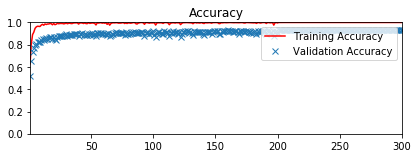

Training accuracies: 
[0.62883990925445465, 0.80982212144351051, 0.89120377032433906, 0.91292853254899065, 0.94695249875491605, 0.9608322078734487, 0.96637834425667801, 0.96505646719124516, 0.96425184638593597, 0.97689588786425297, 0.98387884714469209, 0.97543032845771427, 0.98701112100922439, 0.98203971378487886, 0.98629270956061954, 0.98669501997183828, 0.99045949596252769, 0.98962613868214599, 0.97930975031443701, 0.99132158970085349, 0.98051668154809313, 0.98468346791574468, 0.99270093968217477, 0.98879278140176441, 0.99120664386907664, 0.99175263657001633, 0.99132158970085349, 0.98810310641110377, 0.98974108453105103, 0.99554584901864995, 0.98887899079272523, 0.99255725739245382, 0.99370671571022151, 0.99034455013075084, 0.99106296159648399, 0.9956895313083709, 0.99597689588781291, 0.99545963964481743, 0.99683898962613871, 0.98580418977556827, 0.99491364694387774, 0.99620678755136638, 0.99514353860743121, 0.99103422512141148, 0.99586195005603606, 0.99014339492514147, 0.98985603034

Test Accuracy = 0.920
All done for original_data...
Working on original_normalized_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/original_normalized_data_0...


Epoch:   0%|          | 1/300 [00:03<19:17,  3.87s/epochs]

Model saved at: ./data/original_normalized_data_1...


Epoch:   1%|          | 2/300 [00:07<19:10,  3.86s/epochs]

Model saved at: ./data/original_normalized_data_2...


Epoch:   1%|          | 3/300 [00:11<19:03,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_3...


Epoch:   1%|▏         | 4/300 [00:15<19:04,  3.87s/epochs]

Model saved at: ./data/original_normalized_data_4...


Epoch:   2%|▏         | 5/300 [00:19<18:56,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_5...


Epoch:   2%|▏         | 6/300 [00:23<18:51,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_6...


Epoch:   2%|▏         | 7/300 [00:26<18:47,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_7...


Epoch:   3%|▎         | 8/300 [00:30<18:43,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_8...


Epoch:   3%|▎         | 9/300 [00:34<18:39,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_9...


Epoch:   3%|▎         | 10/300 [00:38<18:35,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_10...


Epoch:   4%|▎         | 11/300 [00:42<18:29,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_11...


Epoch:   4%|▍         | 12/300 [00:46<18:26,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_12...


Epoch:   4%|▍         | 13/300 [00:49<18:22,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_13...


Epoch:   5%|▍         | 14/300 [00:53<18:18,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_14...


Epoch:   5%|▌         | 15/300 [00:57<18:14,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_15...


Epoch:   5%|▌         | 16/300 [01:01<18:11,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_16...


Epoch:   6%|▌         | 17/300 [01:05<18:06,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_17...


Epoch:   6%|▌         | 18/300 [01:09<18:03,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_18...


Epoch:   6%|▋         | 19/300 [01:13<18:00,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_19...


Epoch:   7%|▋         | 20/300 [01:16<17:56,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_20...


Epoch:   7%|▋         | 21/300 [01:20<17:53,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_21...


Epoch:   7%|▋         | 22/300 [01:24<17:49,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_22...


Epoch:   8%|▊         | 23/300 [01:28<17:43,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_23...


Epoch:   8%|▊         | 24/300 [01:32<17:40,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_24...


Epoch:   8%|▊         | 25/300 [01:36<17:37,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_25...


Epoch:   9%|▊         | 26/300 [01:39<17:33,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_26...


Epoch:   9%|▉         | 27/300 [01:43<17:29,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_27...


Epoch:   9%|▉         | 28/300 [01:47<17:26,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_28...


Epoch:  10%|▉         | 29/300 [01:51<17:22,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_29...


Epoch:  10%|█         | 30/300 [01:55<17:17,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_30...


Epoch:  10%|█         | 31/300 [01:59<17:13,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_31...


Epoch:  11%|█         | 32/300 [02:03<17:10,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_32...


Epoch:  11%|█         | 33/300 [02:06<17:06,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_33...


Epoch:  11%|█▏        | 34/300 [02:10<17:01,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_34...


Epoch:  12%|█▏        | 35/300 [02:14<16:57,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_35...


Epoch:  12%|█▏        | 36/300 [02:18<16:53,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_36...


Epoch:  12%|█▏        | 37/300 [02:22<16:49,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_37...


Epoch:  13%|█▎        | 38/300 [02:26<16:46,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_38...


Epoch:  13%|█▎        | 39/300 [02:29<16:42,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_39...


Epoch:  13%|█▎        | 40/300 [02:33<16:39,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_40...


Epoch:  14%|█▎        | 41/300 [02:37<16:35,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_41...


Epoch:  14%|█▍        | 42/300 [02:41<16:30,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_42...


Epoch:  14%|█▍        | 43/300 [02:45<16:26,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_43...


Epoch:  15%|█▍        | 44/300 [02:49<16:22,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_44...


Epoch:  15%|█▌        | 45/300 [02:52<16:18,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_45...


Epoch:  15%|█▌        | 46/300 [02:56<16:15,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_46...


Epoch:  16%|█▌        | 47/300 [03:00<16:11,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_47...


Epoch:  16%|█▌        | 48/300 [03:04<16:08,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_48...


Epoch:  16%|█▋        | 49/300 [03:08<16:03,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_49...


Epoch:  17%|█▋        | 50/300 [03:12<15:59,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_50...


Epoch:  17%|█▋        | 51/300 [03:15<15:55,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_51...


Epoch:  17%|█▋        | 52/300 [03:19<15:52,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_52...


Epoch:  18%|█▊        | 53/300 [03:23<15:49,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_53...


Epoch:  18%|█▊        | 54/300 [03:27<15:45,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_54...


Epoch:  18%|█▊        | 55/300 [03:31<15:40,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_55...


Epoch:  19%|█▊        | 56/300 [03:35<15:36,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_56...


Epoch:  19%|█▉        | 57/300 [03:39<15:33,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_57...


Epoch:  19%|█▉        | 58/300 [03:42<15:29,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_58...


Epoch:  20%|█▉        | 59/300 [03:46<15:25,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_59...


Epoch:  20%|██        | 60/300 [03:50<15:22,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_60...


Epoch:  20%|██        | 61/300 [03:54<15:17,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_61...


Epoch:  21%|██        | 62/300 [03:58<15:14,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_62...


Epoch:  21%|██        | 63/300 [04:02<15:10,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_63...


Epoch:  21%|██▏       | 64/300 [04:05<15:07,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_64...


Epoch:  22%|██▏       | 65/300 [04:09<15:03,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_65...


Epoch:  22%|██▏       | 66/300 [04:13<14:59,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_66...


Epoch:  22%|██▏       | 67/300 [04:17<14:55,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_67...


Epoch:  23%|██▎       | 68/300 [04:21<14:50,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_68...


Epoch:  23%|██▎       | 69/300 [04:25<14:47,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_69...


Epoch:  23%|██▎       | 70/300 [04:28<14:42,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_70...


Epoch:  24%|██▎       | 71/300 [04:32<14:39,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_71...


Epoch:  24%|██▍       | 72/300 [04:36<14:35,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_72...


Epoch:  24%|██▍       | 73/300 [04:40<14:32,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_73...


Epoch:  25%|██▍       | 74/300 [04:44<14:27,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_74...


Epoch:  25%|██▌       | 75/300 [04:48<14:22,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_75...


Epoch:  25%|██▌       | 76/300 [04:52<14:19,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_76...


Epoch:  26%|██▌       | 77/300 [04:55<14:15,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_77...


Epoch:  26%|██▌       | 78/300 [04:59<14:12,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_78...


Epoch:  26%|██▋       | 79/300 [05:03<14:09,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_79...


Epoch:  27%|██▋       | 80/300 [05:07<14:04,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_80...


Epoch:  27%|██▋       | 81/300 [05:11<14:00,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_81...


Epoch:  27%|██▋       | 82/300 [05:15<13:57,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_82...


Epoch:  28%|██▊       | 83/300 [05:18<13:52,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_83...


Epoch:  28%|██▊       | 84/300 [05:22<13:48,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_84...


Epoch:  28%|██▊       | 85/300 [05:26<13:44,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_85...


Epoch:  29%|██▊       | 86/300 [05:30<13:40,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_86...


Epoch:  29%|██▉       | 87/300 [05:34<13:37,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_87...


Epoch:  29%|██▉       | 88/300 [05:38<13:34,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_88...


Epoch:  30%|██▉       | 89/300 [05:41<13:30,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_89...


Epoch:  30%|███       | 90/300 [05:45<13:27,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_90...


Epoch:  30%|███       | 91/300 [05:49<13:23,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_91...


Epoch:  31%|███       | 92/300 [05:53<13:18,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_92...


Epoch:  31%|███       | 93/300 [05:57<13:14,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_93...


Epoch:  31%|███▏      | 94/300 [06:01<13:11,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_94...


Epoch:  32%|███▏      | 95/300 [06:04<13:07,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_95...


Epoch:  32%|███▏      | 96/300 [06:08<13:04,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_96...


Epoch:  32%|███▏      | 97/300 [06:12<13:01,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_97...


Epoch:  33%|███▎      | 98/300 [06:16<12:57,  3.85s/epochs]

Model saved at: ./data/original_normalized_data_98...


Epoch:  33%|███▎      | 99/300 [06:20<12:52,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_99...


Epoch:  33%|███▎      | 100/300 [06:24<12:46,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_100...


Epoch:  34%|███▎      | 101/300 [06:27<12:42,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_101...


Epoch:  34%|███▍      | 102/300 [06:31<12:39,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_102...


Epoch:  34%|███▍      | 103/300 [06:35<12:35,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_103...


Epoch:  35%|███▍      | 104/300 [06:39<12:32,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_104...


Epoch:  35%|███▌      | 105/300 [06:43<12:28,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_105...


Epoch:  35%|███▌      | 106/300 [06:47<12:24,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_106...


Epoch:  36%|███▌      | 107/300 [06:51<12:21,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_107...


Epoch:  36%|███▌      | 108/300 [06:54<12:17,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_108...


Epoch:  36%|███▋      | 109/300 [06:58<12:13,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_109...


Epoch:  37%|███▋      | 110/300 [07:02<12:10,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_110...


Epoch:  37%|███▋      | 111/300 [07:06<12:05,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_111...


Epoch:  37%|███▋      | 112/300 [07:10<12:02,  3.84s/epochs]

Model saved at: ./data/original_normalized_data_112...


Epoch:  38%|███▊      | 113/300 [07:14<11:56,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_113...


Epoch:  38%|███▊      | 114/300 [07:17<11:51,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_114...


Epoch:  38%|███▊      | 115/300 [07:21<11:46,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_115...


Epoch:  39%|███▊      | 116/300 [07:25<11:41,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_116...


Epoch:  39%|███▉      | 117/300 [07:29<11:37,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_117...


Epoch:  39%|███▉      | 118/300 [07:33<11:33,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_118...


Epoch:  40%|███▉      | 119/300 [07:36<11:30,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_119...


Epoch:  40%|████      | 120/300 [07:40<11:27,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_120...


Epoch:  40%|████      | 121/300 [07:44<11:22,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_121...


Epoch:  41%|████      | 122/300 [07:48<11:17,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_122...


Epoch:  41%|████      | 123/300 [07:52<11:14,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_123...


Epoch:  41%|████▏     | 124/300 [07:55<11:10,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_124...


Epoch:  42%|████▏     | 125/300 [07:59<11:06,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_125...


Epoch:  42%|████▏     | 126/300 [08:03<11:02,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_126...


Epoch:  42%|████▏     | 127/300 [08:07<10:58,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_127...


Epoch:  43%|████▎     | 128/300 [08:11<10:55,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_128...


Epoch:  43%|████▎     | 129/300 [08:14<10:51,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_129...


Epoch:  43%|████▎     | 130/300 [08:18<10:47,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_130...


Epoch:  44%|████▎     | 131/300 [08:22<10:43,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_131...


Epoch:  44%|████▍     | 132/300 [08:26<10:39,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_132...


Epoch:  44%|████▍     | 133/300 [08:30<10:35,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_133...


Epoch:  45%|████▍     | 134/300 [08:34<10:32,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_134...


Epoch:  45%|████▌     | 135/300 [08:37<10:28,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_135...


Epoch:  45%|████▌     | 136/300 [08:41<10:24,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_136...


Epoch:  46%|████▌     | 137/300 [08:45<10:20,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_137...


Epoch:  46%|████▌     | 138/300 [08:49<10:17,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_138...


Epoch:  46%|████▋     | 139/300 [08:53<10:13,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_139...


Epoch:  47%|████▋     | 140/300 [08:56<10:09,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_140...


Epoch:  47%|████▋     | 141/300 [09:00<10:05,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_141...


Epoch:  47%|████▋     | 142/300 [09:04<10:01,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_142...


Epoch:  48%|████▊     | 143/300 [09:08<09:58,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_143...


Epoch:  48%|████▊     | 144/300 [09:12<09:54,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_144...


Epoch:  48%|████▊     | 145/300 [09:15<09:50,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_145...


Epoch:  49%|████▊     | 146/300 [09:19<09:47,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_146...


Epoch:  49%|████▉     | 147/300 [09:23<09:43,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_147...


Epoch:  49%|████▉     | 148/300 [09:27<09:38,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_148...


Epoch:  50%|████▉     | 149/300 [09:31<09:35,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_149...


Epoch:  50%|█████     | 150/300 [09:34<09:31,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_150...


Epoch:  50%|█████     | 151/300 [09:38<09:28,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_151...


Epoch:  51%|█████     | 152/300 [09:42<09:24,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_152...


Epoch:  51%|█████     | 153/300 [09:46<09:20,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_153...


Epoch:  51%|█████▏    | 154/300 [09:50<09:16,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_154...


Epoch:  52%|█████▏    | 155/300 [09:54<09:12,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_155...


Epoch:  52%|█████▏    | 156/300 [09:57<09:08,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_156...


Epoch:  52%|█████▏    | 157/300 [10:01<09:04,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_157...


Epoch:  53%|█████▎    | 158/300 [10:05<09:00,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_158...


Epoch:  53%|█████▎    | 159/300 [10:09<08:58,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_159...


Epoch:  53%|█████▎    | 160/300 [10:13<08:54,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_160...


Epoch:  54%|█████▎    | 161/300 [10:16<08:50,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_161...


Epoch:  54%|█████▍    | 162/300 [10:20<08:46,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_162...


Epoch:  54%|█████▍    | 163/300 [10:24<08:42,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_163...


Epoch:  55%|█████▍    | 164/300 [10:28<08:37,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_164...


Epoch:  55%|█████▌    | 165/300 [10:32<08:33,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_165...


Epoch:  55%|█████▌    | 166/300 [10:35<08:30,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_166...


Epoch:  56%|█████▌    | 167/300 [10:39<08:26,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_167...


Epoch:  56%|█████▌    | 168/300 [10:43<08:22,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_168...


Epoch:  56%|█████▋    | 169/300 [10:47<08:18,  3.80s/epochs]

Model saved at: ./data/original_normalized_data_169...


Epoch:  57%|█████▋    | 170/300 [10:51<08:14,  3.80s/epochs]

Model saved at: ./data/original_normalized_data_170...


Epoch:  57%|█████▋    | 171/300 [10:54<08:10,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_171...


Epoch:  57%|█████▋    | 172/300 [10:58<08:07,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_172...


Epoch:  58%|█████▊    | 173/300 [11:02<08:03,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_173...


Epoch:  58%|█████▊    | 174/300 [11:06<07:59,  3.80s/epochs]

Model saved at: ./data/original_normalized_data_174...


Epoch:  58%|█████▊    | 175/300 [11:10<07:56,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_175...


Epoch:  59%|█████▊    | 176/300 [11:14<07:52,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_176...


Epoch:  59%|█████▉    | 177/300 [11:17<07:48,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_177...


Epoch:  59%|█████▉    | 178/300 [11:21<07:45,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_178...


Epoch:  60%|█████▉    | 179/300 [11:25<07:41,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_179...


Epoch:  60%|██████    | 180/300 [11:29<07:37,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_180...


Epoch:  60%|██████    | 181/300 [11:33<07:33,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_181...


Epoch:  61%|██████    | 182/300 [11:36<07:29,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_182...


Epoch:  61%|██████    | 183/300 [11:40<07:25,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_183...


Epoch:  61%|██████▏   | 184/300 [11:44<07:22,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_184...


Epoch:  62%|██████▏   | 185/300 [11:48<07:17,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_185...


Epoch:  62%|██████▏   | 186/300 [11:52<07:14,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_186...


Epoch:  62%|██████▏   | 187/300 [11:55<07:10,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_187...


Epoch:  63%|██████▎   | 188/300 [11:59<07:06,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_188...


Epoch:  63%|██████▎   | 189/300 [12:03<07:02,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_189...


Epoch:  63%|██████▎   | 190/300 [12:07<06:58,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_190...


Epoch:  64%|██████▎   | 191/300 [12:11<06:54,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_191...


Epoch:  64%|██████▍   | 192/300 [12:14<06:51,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_192...


Epoch:  64%|██████▍   | 193/300 [12:18<06:47,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_193...


Epoch:  65%|██████▍   | 194/300 [12:22<06:43,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_194...


Epoch:  65%|██████▌   | 195/300 [12:26<06:39,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_195...


Epoch:  65%|██████▌   | 196/300 [12:30<06:35,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_196...


Epoch:  66%|██████▌   | 197/300 [12:34<06:32,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_197...


Epoch:  66%|██████▌   | 198/300 [12:37<06:28,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_198...


Epoch:  66%|██████▋   | 199/300 [12:41<06:24,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_199...


Epoch:  67%|██████▋   | 200/300 [12:45<06:20,  3.80s/epochs]

Model saved at: ./data/original_normalized_data_200...


Epoch:  67%|██████▋   | 201/300 [12:49<06:16,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_201...


Epoch:  67%|██████▋   | 202/300 [12:53<06:13,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_202...


Epoch:  68%|██████▊   | 203/300 [12:56<06:09,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_203...


Epoch:  68%|██████▊   | 204/300 [13:00<06:05,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_204...


Epoch:  68%|██████▊   | 205/300 [13:04<06:01,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_205...


Epoch:  69%|██████▊   | 206/300 [13:08<05:57,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_206...


Epoch:  69%|██████▉   | 207/300 [13:12<05:54,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_207...


Epoch:  69%|██████▉   | 208/300 [13:15<05:51,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_208...


Epoch:  70%|██████▉   | 209/300 [13:19<05:47,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_209...


Epoch:  70%|███████   | 210/300 [13:23<05:43,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_210...


Epoch:  70%|███████   | 211/300 [13:27<05:38,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_211...


Epoch:  71%|███████   | 212/300 [13:31<05:35,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_212...


Epoch:  71%|███████   | 213/300 [13:35<05:31,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_213...


Epoch:  71%|███████▏  | 214/300 [13:38<05:27,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_214...


Epoch:  72%|███████▏  | 215/300 [13:42<05:23,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_215...


Epoch:  72%|███████▏  | 216/300 [13:46<05:19,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_216...


Epoch:  72%|███████▏  | 217/300 [13:50<05:16,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_217...


Epoch:  73%|███████▎  | 218/300 [13:54<05:12,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_218...


Epoch:  73%|███████▎  | 219/300 [13:57<05:08,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_219...


Epoch:  73%|███████▎  | 220/300 [14:01<05:04,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_220...


Epoch:  74%|███████▎  | 221/300 [14:05<05:00,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_221...


Epoch:  74%|███████▍  | 222/300 [14:09<04:57,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_222...


Epoch:  74%|███████▍  | 223/300 [14:13<04:53,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_223...


Epoch:  75%|███████▍  | 224/300 [14:16<04:49,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_224...


Epoch:  75%|███████▌  | 225/300 [14:20<04:45,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_225...


Epoch:  75%|███████▌  | 226/300 [14:24<04:41,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_226...


Epoch:  76%|███████▌  | 227/300 [14:28<04:37,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_227...


Epoch:  76%|███████▌  | 228/300 [14:32<04:34,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_228...


Epoch:  76%|███████▋  | 229/300 [14:35<04:30,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_229...


Epoch:  77%|███████▋  | 230/300 [14:39<04:26,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_230...


Epoch:  77%|███████▋  | 231/300 [14:43<04:22,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_231...


Epoch:  77%|███████▋  | 232/300 [14:47<04:18,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_232...


Epoch:  78%|███████▊  | 233/300 [14:51<04:15,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_233...


Epoch:  78%|███████▊  | 234/300 [14:55<04:11,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_234...


Epoch:  78%|███████▊  | 235/300 [14:58<04:07,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_235...


Epoch:  79%|███████▊  | 236/300 [15:02<04:04,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_236...


Epoch:  79%|███████▉  | 237/300 [15:06<03:59,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_237...


Epoch:  79%|███████▉  | 238/300 [15:10<03:56,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_238...


Epoch:  80%|███████▉  | 239/300 [15:14<03:52,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_239...


Epoch:  80%|████████  | 240/300 [15:17<03:48,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_240...


Epoch:  80%|████████  | 241/300 [15:21<03:44,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_241...


Epoch:  81%|████████  | 242/300 [15:25<03:41,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_242...


Epoch:  81%|████████  | 243/300 [15:29<03:37,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_243...


Epoch:  81%|████████▏ | 244/300 [15:33<03:33,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_244...


Epoch:  82%|████████▏ | 245/300 [15:36<03:29,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_245...


Epoch:  82%|████████▏ | 246/300 [15:40<03:25,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_246...


Epoch:  82%|████████▏ | 247/300 [15:44<03:22,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_247...


Epoch:  83%|████████▎ | 248/300 [15:48<03:18,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_248...


Epoch:  83%|████████▎ | 249/300 [15:52<03:14,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_249...


Epoch:  83%|████████▎ | 250/300 [15:56<03:10,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_250...


Epoch:  84%|████████▎ | 251/300 [15:59<03:06,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_251...


Epoch:  84%|████████▍ | 252/300 [16:03<03:02,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_252...


Epoch:  84%|████████▍ | 253/300 [16:07<02:58,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_253...


Epoch:  85%|████████▍ | 254/300 [16:11<02:55,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_254...


Epoch:  85%|████████▌ | 255/300 [16:15<02:51,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_255...


Epoch:  85%|████████▌ | 256/300 [16:18<02:47,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_256...


Epoch:  86%|████████▌ | 257/300 [16:22<02:44,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_257...


Epoch:  86%|████████▌ | 258/300 [16:26<02:40,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_258...


Epoch:  86%|████████▋ | 259/300 [16:30<02:36,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_259...


Epoch:  87%|████████▋ | 260/300 [16:34<02:32,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_260...


Epoch:  87%|████████▋ | 261/300 [16:37<02:28,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_261...


Epoch:  87%|████████▋ | 262/300 [16:41<02:24,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_262...


Epoch:  88%|████████▊ | 263/300 [16:45<02:21,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_263...


Epoch:  88%|████████▊ | 264/300 [16:49<02:17,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_264...


Epoch:  88%|████████▊ | 265/300 [16:53<02:13,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_265...


Epoch:  89%|████████▊ | 266/300 [16:56<02:09,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_266...


Epoch:  89%|████████▉ | 267/300 [17:00<02:05,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_267...


Epoch:  89%|████████▉ | 268/300 [17:04<02:02,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_268...


Epoch:  90%|████████▉ | 269/300 [17:08<01:58,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_269...


Epoch:  90%|█████████ | 270/300 [17:12<01:54,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_270...


Epoch:  90%|█████████ | 271/300 [17:16<01:50,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_271...


Epoch:  91%|█████████ | 272/300 [17:19<01:46,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_272...


Epoch:  91%|█████████ | 273/300 [17:23<01:42,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_273...


Epoch:  91%|█████████▏| 274/300 [17:27<01:39,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_274...


Epoch:  92%|█████████▏| 275/300 [17:31<01:35,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_275...


Epoch:  92%|█████████▏| 276/300 [17:35<01:31,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_276...


Epoch:  92%|█████████▏| 277/300 [17:38<01:27,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_277...


Epoch:  93%|█████████▎| 278/300 [17:42<01:23,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_278...


Epoch:  93%|█████████▎| 279/300 [17:46<01:20,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_279...


Epoch:  93%|█████████▎| 280/300 [17:50<01:16,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_280...


Epoch:  94%|█████████▎| 281/300 [17:54<01:12,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_281...


Epoch:  94%|█████████▍| 282/300 [17:58<01:08,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_282...


Epoch:  94%|█████████▍| 283/300 [18:01<01:04,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_283...


Epoch:  95%|█████████▍| 284/300 [18:05<01:01,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_284...


Epoch:  95%|█████████▌| 285/300 [18:09<00:57,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_285...


Epoch:  95%|█████████▌| 286/300 [18:13<00:53,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_286...


Epoch:  96%|█████████▌| 287/300 [18:17<00:49,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_287...


Epoch:  96%|█████████▌| 288/300 [18:20<00:45,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_288...


Epoch:  96%|█████████▋| 289/300 [18:24<00:41,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_289...


Epoch:  97%|█████████▋| 290/300 [18:28<00:38,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_290...


Epoch:  97%|█████████▋| 291/300 [18:32<00:34,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_291...


Epoch:  97%|█████████▋| 292/300 [18:36<00:30,  3.81s/epochs]

Model saved at: ./data/original_normalized_data_292...


Epoch:  98%|█████████▊| 293/300 [18:39<00:26,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_293...


Epoch:  98%|█████████▊| 294/300 [18:43<00:22,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_294...


Epoch:  98%|█████████▊| 295/300 [18:47<00:19,  3.83s/epochs]

Model saved at: ./data/original_normalized_data_295...


Epoch:  99%|█████████▊| 296/300 [18:51<00:15,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_296...


Epoch:  99%|█████████▉| 297/300 [18:55<00:11,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_297...


Epoch:  99%|█████████▉| 298/300 [18:59<00:07,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_298...


Epoch: 100%|█████████▉| 299/300 [19:02<00:03,  3.82s/epochs]

Model saved at: ./data/original_normalized_data_299...


Epoch: 100%|██████████| 300/300 [19:06<00:00,  3.82s/epochs]


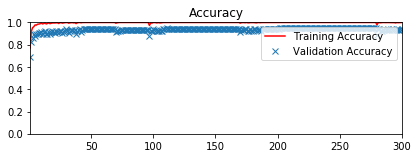

Training accuracies: 
[0.7709991668979308, 0.91959539077491537, 0.95275726322538667, 0.9622690307535301, 0.97807408260570838, 0.9766659961664429, 0.98448231274439191, 0.98586166270858488, 0.98844794392356239, 0.99431018132704962, 0.98726974913072219, 0.99028707724911902, 0.99471249173826837, 0.98692491165252005, 0.9916376907382396, 0.99629299694232731, 0.98953992930831347, 0.99336187821489119, 0.99548837610276153, 0.99560332193453838, 0.99566079485042669, 0.99698267191585965, 0.99741371878502261, 0.99094801579896374, 0.99761487399063187, 0.99778729273829703, 0.9942527084111612, 0.99666657087847355, 0.99841949481306935, 0.99908043334578578, 0.99965516250466968, 0.99396534383171931, 0.9965516250466967, 0.9985631771027903, 0.99867812293456704, 0.99635046984108744, 0.99804592085979482, 0.99043075950458348, 0.99741371880215079, 0.99916664271961841, 0.99988505416822326, 0.99715509066352481, 0.99965516250466968, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

Test Accuracy = 0.927
All done for original_normalized_data...
Working on cropped_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/cropped_data_0...


Epoch:   0%|          | 1/300 [00:03<19:09,  3.85s/epochs]

Model saved at: ./data/cropped_data_1...


Epoch:   1%|          | 2/300 [00:07<19:01,  3.83s/epochs]

Model saved at: ./data/cropped_data_2...


Epoch:   1%|          | 3/300 [00:11<18:53,  3.82s/epochs]

Model saved at: ./data/cropped_data_3...


Epoch:   1%|▏         | 4/300 [00:15<18:54,  3.83s/epochs]

Model saved at: ./data/cropped_data_4...


Epoch:   2%|▏         | 5/300 [00:19<18:47,  3.82s/epochs]

Model saved at: ./data/cropped_data_5...


Epoch:   2%|▏         | 6/300 [00:22<18:41,  3.81s/epochs]

Model saved at: ./data/cropped_data_6...


Epoch:   2%|▏         | 7/300 [00:26<18:35,  3.81s/epochs]

Model saved at: ./data/cropped_data_7...


Epoch:   3%|▎         | 8/300 [00:30<18:29,  3.80s/epochs]

Model saved at: ./data/cropped_data_8...


Epoch:   3%|▎         | 9/300 [00:34<18:25,  3.80s/epochs]

Model saved at: ./data/cropped_data_9...


Epoch:   3%|▎         | 10/300 [00:38<18:21,  3.80s/epochs]

Model saved at: ./data/cropped_data_10...


Epoch:   4%|▎         | 11/300 [00:41<18:17,  3.80s/epochs]

Model saved at: ./data/cropped_data_11...


Epoch:   4%|▍         | 12/300 [00:45<18:13,  3.80s/epochs]

Model saved at: ./data/cropped_data_12...


Epoch:   4%|▍         | 13/300 [00:49<18:08,  3.79s/epochs]

Model saved at: ./data/cropped_data_13...


Epoch:   5%|▍         | 14/300 [00:53<18:04,  3.79s/epochs]

Model saved at: ./data/cropped_data_14...


Epoch:   5%|▌         | 15/300 [00:57<18:01,  3.79s/epochs]

Model saved at: ./data/cropped_data_15...


Epoch:   5%|▌         | 16/300 [01:00<17:57,  3.80s/epochs]

Model saved at: ./data/cropped_data_16...


Epoch:   6%|▌         | 17/300 [01:04<17:53,  3.79s/epochs]

Model saved at: ./data/cropped_data_17...


Epoch:   6%|▌         | 18/300 [01:08<17:48,  3.79s/epochs]

Model saved at: ./data/cropped_data_18...


Epoch:   6%|▋         | 19/300 [01:12<17:45,  3.79s/epochs]

Model saved at: ./data/cropped_data_19...


Epoch:   7%|▋         | 20/300 [01:15<17:41,  3.79s/epochs]

Model saved at: ./data/cropped_data_20...


Epoch:   7%|▋         | 21/300 [01:19<17:38,  3.79s/epochs]

Model saved at: ./data/cropped_data_21...


Epoch:   7%|▋         | 22/300 [01:23<17:33,  3.79s/epochs]

Model saved at: ./data/cropped_data_22...


Epoch:   8%|▊         | 23/300 [01:27<17:30,  3.79s/epochs]

Model saved at: ./data/cropped_data_23...


Epoch:   8%|▊         | 24/300 [01:31<17:26,  3.79s/epochs]

Model saved at: ./data/cropped_data_24...


Epoch:   8%|▊         | 25/300 [01:34<17:23,  3.79s/epochs]

Model saved at: ./data/cropped_data_25...


Epoch:   9%|▊         | 26/300 [01:38<17:19,  3.79s/epochs]

Model saved at: ./data/cropped_data_26...


Epoch:   9%|▉         | 27/300 [01:42<17:14,  3.79s/epochs]

Model saved at: ./data/cropped_data_27...


Epoch:   9%|▉         | 28/300 [01:46<17:11,  3.79s/epochs]

Model saved at: ./data/cropped_data_28...


Epoch:  10%|▉         | 29/300 [01:50<17:07,  3.79s/epochs]

Model saved at: ./data/cropped_data_29...


Epoch:  10%|█         | 30/300 [01:53<17:08,  3.81s/epochs]

Model saved at: ./data/cropped_data_30...


Epoch:  10%|█         | 31/300 [01:57<17:04,  3.81s/epochs]

Model saved at: ./data/cropped_data_31...


Epoch:  11%|█         | 32/300 [02:01<16:58,  3.80s/epochs]

Model saved at: ./data/cropped_data_32...


Epoch:  11%|█         | 33/300 [02:05<16:54,  3.80s/epochs]

Model saved at: ./data/cropped_data_33...


Epoch:  11%|█▏        | 34/300 [02:09<16:51,  3.80s/epochs]

Model saved at: ./data/cropped_data_34...


Epoch:  12%|█▏        | 35/300 [02:12<16:48,  3.80s/epochs]

Model saved at: ./data/cropped_data_35...


Epoch:  12%|█▏        | 36/300 [02:16<16:43,  3.80s/epochs]

Model saved at: ./data/cropped_data_36...


Epoch:  12%|█▏        | 37/300 [02:20<16:38,  3.80s/epochs]

Model saved at: ./data/cropped_data_37...


Epoch:  13%|█▎        | 38/300 [02:24<16:34,  3.80s/epochs]

Model saved at: ./data/cropped_data_38...


Epoch:  13%|█▎        | 39/300 [02:28<16:30,  3.80s/epochs]

Model saved at: ./data/cropped_data_39...


Epoch:  13%|█▎        | 40/300 [02:31<16:27,  3.80s/epochs]

Model saved at: ./data/cropped_data_40...


Epoch:  14%|█▎        | 41/300 [02:35<16:23,  3.80s/epochs]

Model saved at: ./data/cropped_data_41...


Epoch:  14%|█▍        | 42/300 [02:39<16:18,  3.79s/epochs]

Model saved at: ./data/cropped_data_42...


Epoch:  14%|█▍        | 43/300 [02:43<16:14,  3.79s/epochs]

Model saved at: ./data/cropped_data_43...


Epoch:  15%|█▍        | 44/300 [02:47<16:11,  3.79s/epochs]

Model saved at: ./data/cropped_data_44...


Epoch:  15%|█▌        | 45/300 [02:50<16:08,  3.80s/epochs]

Model saved at: ./data/cropped_data_45...


Epoch:  15%|█▌        | 46/300 [02:54<16:04,  3.80s/epochs]

Model saved at: ./data/cropped_data_46...


Epoch:  16%|█▌        | 47/300 [02:58<15:59,  3.79s/epochs]

Model saved at: ./data/cropped_data_47...


Epoch:  16%|█▌        | 48/300 [03:02<15:55,  3.79s/epochs]

Model saved at: ./data/cropped_data_48...


Epoch:  16%|█▋        | 49/300 [03:06<15:51,  3.79s/epochs]

Model saved at: ./data/cropped_data_49...


Epoch:  17%|█▋        | 50/300 [03:09<15:48,  3.79s/epochs]

Model saved at: ./data/cropped_data_50...


Epoch:  17%|█▋        | 51/300 [03:13<15:44,  3.79s/epochs]

Model saved at: ./data/cropped_data_51...


Epoch:  17%|█▋        | 52/300 [03:17<15:39,  3.79s/epochs]

Model saved at: ./data/cropped_data_52...


Epoch:  18%|█▊        | 53/300 [03:21<15:36,  3.79s/epochs]

Model saved at: ./data/cropped_data_53...


Epoch:  18%|█▊        | 54/300 [03:25<15:33,  3.79s/epochs]

Model saved at: ./data/cropped_data_54...


Epoch:  18%|█▊        | 55/300 [03:28<15:29,  3.79s/epochs]

Model saved at: ./data/cropped_data_55...


Epoch:  19%|█▊        | 56/300 [03:32<15:26,  3.80s/epochs]

Model saved at: ./data/cropped_data_56...


Epoch:  19%|█▉        | 57/300 [03:36<15:21,  3.79s/epochs]

Model saved at: ./data/cropped_data_57...


Epoch:  19%|█▉        | 58/300 [03:40<15:17,  3.79s/epochs]

Model saved at: ./data/cropped_data_58...


Epoch:  20%|█▉        | 59/300 [03:43<15:14,  3.79s/epochs]

Model saved at: ./data/cropped_data_59...


Epoch:  20%|██        | 60/300 [03:47<15:10,  3.79s/epochs]

Model saved at: ./data/cropped_data_60...


Epoch:  20%|██        | 61/300 [03:51<15:08,  3.80s/epochs]

Model saved at: ./data/cropped_data_61...


Epoch:  21%|██        | 62/300 [03:55<15:04,  3.80s/epochs]

Model saved at: ./data/cropped_data_62...


Epoch:  21%|██        | 63/300 [03:59<15:00,  3.80s/epochs]

Model saved at: ./data/cropped_data_63...


Epoch:  21%|██▏       | 64/300 [04:03<14:56,  3.80s/epochs]

Model saved at: ./data/cropped_data_64...


Epoch:  22%|██▏       | 65/300 [04:06<14:52,  3.80s/epochs]

Model saved at: ./data/cropped_data_65...


Epoch:  22%|██▏       | 66/300 [04:10<14:48,  3.80s/epochs]

Model saved at: ./data/cropped_data_66...


Epoch:  22%|██▏       | 67/300 [04:14<14:44,  3.80s/epochs]

Model saved at: ./data/cropped_data_67...


Epoch:  23%|██▎       | 68/300 [04:18<14:40,  3.80s/epochs]

Model saved at: ./data/cropped_data_68...


Epoch:  23%|██▎       | 69/300 [04:21<14:36,  3.80s/epochs]

Model saved at: ./data/cropped_data_69...


Epoch:  23%|██▎       | 70/300 [04:25<14:33,  3.80s/epochs]

Model saved at: ./data/cropped_data_70...


Epoch:  24%|██▎       | 71/300 [04:29<14:28,  3.79s/epochs]

Model saved at: ./data/cropped_data_71...


Epoch:  24%|██▍       | 72/300 [04:33<14:24,  3.79s/epochs]

Model saved at: ./data/cropped_data_72...


Epoch:  24%|██▍       | 73/300 [04:37<14:21,  3.79s/epochs]

Model saved at: ./data/cropped_data_73...


Epoch:  25%|██▍       | 74/300 [04:40<14:17,  3.79s/epochs]

Model saved at: ./data/cropped_data_74...


Epoch:  25%|██▌       | 75/300 [04:44<14:14,  3.80s/epochs]

Model saved at: ./data/cropped_data_75...


Epoch:  25%|██▌       | 76/300 [04:48<14:09,  3.79s/epochs]

Model saved at: ./data/cropped_data_76...


Epoch:  26%|██▌       | 77/300 [04:52<14:05,  3.79s/epochs]

Model saved at: ./data/cropped_data_77...


Epoch:  26%|██▌       | 78/300 [04:56<14:02,  3.79s/epochs]

Model saved at: ./data/cropped_data_78...


Epoch:  26%|██▋       | 79/300 [04:59<13:58,  3.80s/epochs]

Model saved at: ./data/cropped_data_79...


Epoch:  27%|██▋       | 80/300 [05:03<13:56,  3.80s/epochs]

Model saved at: ./data/cropped_data_80...


Epoch:  27%|██▋       | 81/300 [05:07<13:52,  3.80s/epochs]

Model saved at: ./data/cropped_data_81...


Epoch:  27%|██▋       | 82/300 [05:11<13:48,  3.80s/epochs]

Model saved at: ./data/cropped_data_82...


Epoch:  28%|██▊       | 83/300 [05:15<13:44,  3.80s/epochs]

Model saved at: ./data/cropped_data_83...


Epoch:  28%|██▊       | 84/300 [05:18<13:40,  3.80s/epochs]

Model saved at: ./data/cropped_data_84...


Epoch:  28%|██▊       | 85/300 [05:22<13:36,  3.80s/epochs]

Model saved at: ./data/cropped_data_85...


Epoch:  29%|██▊       | 86/300 [05:26<13:31,  3.79s/epochs]

Model saved at: ./data/cropped_data_86...


Epoch:  29%|██▉       | 87/300 [05:30<13:28,  3.79s/epochs]

Model saved at: ./data/cropped_data_87...


Epoch:  29%|██▉       | 88/300 [05:34<13:24,  3.79s/epochs]

Model saved at: ./data/cropped_data_88...


Epoch:  30%|██▉       | 89/300 [05:37<13:20,  3.79s/epochs]

Model saved at: ./data/cropped_data_89...


Epoch:  30%|███       | 90/300 [05:41<13:16,  3.79s/epochs]

Model saved at: ./data/cropped_data_90...


Epoch:  30%|███       | 91/300 [05:45<13:12,  3.79s/epochs]

Model saved at: ./data/cropped_data_91...


Epoch:  31%|███       | 92/300 [05:49<13:09,  3.79s/epochs]

Model saved at: ./data/cropped_data_92...


Epoch:  31%|███       | 93/300 [05:53<13:06,  3.80s/epochs]

Model saved at: ./data/cropped_data_93...


Epoch:  31%|███▏      | 94/300 [05:56<13:02,  3.80s/epochs]

Model saved at: ./data/cropped_data_94...


Epoch:  32%|███▏      | 95/300 [06:00<12:58,  3.80s/epochs]

Model saved at: ./data/cropped_data_95...


Epoch:  32%|███▏      | 96/300 [06:04<12:53,  3.79s/epochs]

Model saved at: ./data/cropped_data_96...


Epoch:  32%|███▏      | 97/300 [06:08<12:49,  3.79s/epochs]

Model saved at: ./data/cropped_data_97...


Epoch:  33%|███▎      | 98/300 [06:12<12:46,  3.79s/epochs]

Model saved at: ./data/cropped_data_98...


Epoch:  33%|███▎      | 99/300 [06:15<12:42,  3.79s/epochs]

Model saved at: ./data/cropped_data_99...


Epoch:  33%|███▎      | 100/300 [06:19<12:39,  3.80s/epochs]

Model saved at: ./data/cropped_data_100...


Epoch:  34%|███▎      | 101/300 [06:23<12:34,  3.79s/epochs]

Model saved at: ./data/cropped_data_101...


Epoch:  34%|███▍      | 102/300 [06:27<12:31,  3.79s/epochs]

Model saved at: ./data/cropped_data_102...


Epoch:  34%|███▍      | 103/300 [06:31<12:27,  3.79s/epochs]

Model saved at: ./data/cropped_data_103...


Epoch:  35%|███▍      | 104/300 [06:34<12:24,  3.80s/epochs]

Model saved at: ./data/cropped_data_104...


Epoch:  35%|███▌      | 105/300 [06:38<12:20,  3.80s/epochs]

Model saved at: ./data/cropped_data_105...


Epoch:  35%|███▌      | 106/300 [06:42<12:15,  3.79s/epochs]

Model saved at: ./data/cropped_data_106...


Epoch:  36%|███▌      | 107/300 [06:46<12:12,  3.79s/epochs]

Model saved at: ./data/cropped_data_107...


Epoch:  36%|███▌      | 108/300 [06:49<12:08,  3.79s/epochs]

Model saved at: ./data/cropped_data_108...


Epoch:  36%|███▋      | 109/300 [06:53<12:05,  3.80s/epochs]

Model saved at: ./data/cropped_data_109...


Epoch:  37%|███▋      | 110/300 [06:57<12:01,  3.80s/epochs]

Model saved at: ./data/cropped_data_110...


Epoch:  37%|███▋      | 111/300 [07:01<11:59,  3.81s/epochs]

Model saved at: ./data/cropped_data_111...


Epoch:  37%|███▋      | 112/300 [07:05<11:56,  3.81s/epochs]

Model saved at: ./data/cropped_data_112...


Epoch:  38%|███▊      | 113/300 [07:09<11:52,  3.81s/epochs]

Model saved at: ./data/cropped_data_113...


Epoch:  38%|███▊      | 114/300 [07:12<11:47,  3.80s/epochs]

Model saved at: ./data/cropped_data_114...


Epoch:  38%|███▊      | 115/300 [07:16<11:43,  3.80s/epochs]

Model saved at: ./data/cropped_data_115...


Epoch:  39%|███▊      | 116/300 [07:20<11:38,  3.80s/epochs]

Model saved at: ./data/cropped_data_116...


Epoch:  39%|███▉      | 117/300 [07:24<11:35,  3.80s/epochs]

Model saved at: ./data/cropped_data_117...


Epoch:  39%|███▉      | 118/300 [07:28<11:31,  3.80s/epochs]

Model saved at: ./data/cropped_data_118...


Epoch:  40%|███▉      | 119/300 [07:31<11:27,  3.80s/epochs]

Model saved at: ./data/cropped_data_119...


Epoch:  40%|████      | 120/300 [07:35<11:23,  3.80s/epochs]

Model saved at: ./data/cropped_data_120...


Epoch:  40%|████      | 121/300 [07:39<11:19,  3.79s/epochs]

Model saved at: ./data/cropped_data_121...


Epoch:  41%|████      | 122/300 [07:43<11:15,  3.79s/epochs]

Model saved at: ./data/cropped_data_122...


Epoch:  41%|████      | 123/300 [07:47<11:12,  3.80s/epochs]

Model saved at: ./data/cropped_data_123...


Epoch:  41%|████▏     | 124/300 [07:50<11:09,  3.81s/epochs]

Model saved at: ./data/cropped_data_124...


Epoch:  42%|████▏     | 125/300 [07:54<11:05,  3.80s/epochs]

Model saved at: ./data/cropped_data_125...


Epoch:  42%|████▏     | 126/300 [07:58<11:01,  3.80s/epochs]

Model saved at: ./data/cropped_data_126...


Epoch:  42%|████▏     | 127/300 [08:02<10:57,  3.80s/epochs]

Model saved at: ./data/cropped_data_127...


Epoch:  43%|████▎     | 128/300 [08:06<10:53,  3.80s/epochs]

Model saved at: ./data/cropped_data_128...


Epoch:  43%|████▎     | 129/300 [08:09<10:49,  3.80s/epochs]

Model saved at: ./data/cropped_data_129...


Epoch:  43%|████▎     | 130/300 [08:13<10:45,  3.80s/epochs]

Model saved at: ./data/cropped_data_130...


Epoch:  44%|████▎     | 131/300 [08:17<10:41,  3.80s/epochs]

Model saved at: ./data/cropped_data_131...


Epoch:  44%|████▍     | 132/300 [08:21<10:38,  3.80s/epochs]

Model saved at: ./data/cropped_data_132...


Epoch:  44%|████▍     | 133/300 [08:25<10:34,  3.80s/epochs]

Model saved at: ./data/cropped_data_133...


Epoch:  45%|████▍     | 134/300 [08:28<10:30,  3.80s/epochs]

Model saved at: ./data/cropped_data_134...


Epoch:  45%|████▌     | 135/300 [08:32<10:26,  3.80s/epochs]

Model saved at: ./data/cropped_data_135...


Epoch:  45%|████▌     | 136/300 [08:36<10:22,  3.80s/epochs]

Model saved at: ./data/cropped_data_136...


Epoch:  46%|████▌     | 137/300 [08:40<10:19,  3.80s/epochs]

Model saved at: ./data/cropped_data_137...


Epoch:  46%|████▌     | 138/300 [08:44<10:15,  3.80s/epochs]

Model saved at: ./data/cropped_data_138...


Epoch:  46%|████▋     | 139/300 [08:47<10:11,  3.80s/epochs]

Model saved at: ./data/cropped_data_139...


Epoch:  47%|████▋     | 140/300 [08:51<10:08,  3.80s/epochs]

Model saved at: ./data/cropped_data_140...


Epoch:  47%|████▋     | 141/300 [08:55<10:04,  3.80s/epochs]

Model saved at: ./data/cropped_data_141...


Epoch:  47%|████▋     | 142/300 [08:59<10:00,  3.80s/epochs]

Model saved at: ./data/cropped_data_142...


Epoch:  48%|████▊     | 143/300 [09:03<09:56,  3.80s/epochs]

Model saved at: ./data/cropped_data_143...


Epoch:  48%|████▊     | 144/300 [09:06<09:52,  3.80s/epochs]

Model saved at: ./data/cropped_data_144...


Epoch:  48%|████▊     | 145/300 [09:10<09:48,  3.80s/epochs]

Model saved at: ./data/cropped_data_145...


Epoch:  49%|████▊     | 146/300 [09:14<09:44,  3.80s/epochs]

Model saved at: ./data/cropped_data_146...


Epoch:  49%|████▉     | 147/300 [09:18<09:41,  3.80s/epochs]

Model saved at: ./data/cropped_data_147...


Epoch:  49%|████▉     | 148/300 [09:21<09:37,  3.80s/epochs]

Model saved at: ./data/cropped_data_148...


Epoch:  50%|████▉     | 149/300 [09:25<09:33,  3.80s/epochs]

Model saved at: ./data/cropped_data_149...


Epoch:  50%|█████     | 150/300 [09:29<09:29,  3.79s/epochs]

Model saved at: ./data/cropped_data_150...


Epoch:  50%|█████     | 151/300 [09:33<09:25,  3.80s/epochs]

Model saved at: ./data/cropped_data_151...


Epoch:  51%|█████     | 152/300 [09:37<09:21,  3.80s/epochs]

Model saved at: ./data/cropped_data_152...


Epoch:  51%|█████     | 153/300 [09:40<09:17,  3.79s/epochs]

Model saved at: ./data/cropped_data_153...


Epoch:  51%|█████▏    | 154/300 [09:44<09:14,  3.80s/epochs]

Model saved at: ./data/cropped_data_154...


Epoch:  52%|█████▏    | 155/300 [09:48<09:10,  3.79s/epochs]

Model saved at: ./data/cropped_data_155...


Epoch:  52%|█████▏    | 156/300 [09:52<09:07,  3.80s/epochs]

Model saved at: ./data/cropped_data_156...


Epoch:  52%|█████▏    | 157/300 [09:56<09:03,  3.80s/epochs]

Model saved at: ./data/cropped_data_157...


Epoch:  53%|█████▎    | 158/300 [09:59<08:59,  3.80s/epochs]

Model saved at: ./data/cropped_data_158...


Epoch:  53%|█████▎    | 159/300 [10:03<08:55,  3.80s/epochs]

Model saved at: ./data/cropped_data_159...


Epoch:  53%|█████▎    | 160/300 [10:07<08:51,  3.80s/epochs]

Model saved at: ./data/cropped_data_160...


Epoch:  54%|█████▎    | 161/300 [10:11<08:48,  3.80s/epochs]

Model saved at: ./data/cropped_data_161...


Epoch:  54%|█████▍    | 162/300 [10:15<08:44,  3.80s/epochs]

Model saved at: ./data/cropped_data_162...


Epoch:  54%|█████▍    | 163/300 [10:18<08:40,  3.80s/epochs]

Model saved at: ./data/cropped_data_163...


Epoch:  55%|█████▍    | 164/300 [10:22<08:36,  3.80s/epochs]

Model saved at: ./data/cropped_data_164...


Epoch:  55%|█████▌    | 165/300 [10:26<08:32,  3.80s/epochs]

Model saved at: ./data/cropped_data_165...


Epoch:  55%|█████▌    | 166/300 [10:30<08:28,  3.80s/epochs]

Model saved at: ./data/cropped_data_166...


Epoch:  56%|█████▌    | 167/300 [10:34<08:24,  3.80s/epochs]

Model saved at: ./data/cropped_data_167...


Epoch:  56%|█████▌    | 168/300 [10:37<08:21,  3.80s/epochs]

Model saved at: ./data/cropped_data_168...


Epoch:  56%|█████▋    | 169/300 [10:41<08:17,  3.80s/epochs]

Model saved at: ./data/cropped_data_169...


Epoch:  57%|█████▋    | 170/300 [10:45<08:13,  3.80s/epochs]

Model saved at: ./data/cropped_data_170...


Epoch:  57%|█████▋    | 171/300 [10:49<08:09,  3.80s/epochs]

Model saved at: ./data/cropped_data_171...


Epoch:  57%|█████▋    | 172/300 [10:53<08:06,  3.80s/epochs]

Model saved at: ./data/cropped_data_172...


Epoch:  58%|█████▊    | 173/300 [10:56<08:02,  3.80s/epochs]

Model saved at: ./data/cropped_data_173...


Epoch:  58%|█████▊    | 174/300 [11:00<07:58,  3.80s/epochs]

Model saved at: ./data/cropped_data_174...


Epoch:  58%|█████▊    | 175/300 [11:04<07:54,  3.79s/epochs]

Model saved at: ./data/cropped_data_175...


Epoch:  59%|█████▊    | 176/300 [11:08<07:50,  3.80s/epochs]

Model saved at: ./data/cropped_data_176...


Epoch:  59%|█████▉    | 177/300 [11:12<07:46,  3.80s/epochs]

Model saved at: ./data/cropped_data_177...


Epoch:  59%|█████▉    | 178/300 [11:15<07:43,  3.80s/epochs]

Model saved at: ./data/cropped_data_178...


Epoch:  60%|█████▉    | 179/300 [11:19<07:39,  3.80s/epochs]

Model saved at: ./data/cropped_data_179...


Epoch:  60%|██████    | 180/300 [11:23<07:35,  3.79s/epochs]

Model saved at: ./data/cropped_data_180...


Epoch:  60%|██████    | 181/300 [11:27<07:31,  3.80s/epochs]

Model saved at: ./data/cropped_data_181...


Epoch:  61%|██████    | 182/300 [11:31<07:27,  3.80s/epochs]

Model saved at: ./data/cropped_data_182...


Epoch:  61%|██████    | 183/300 [11:34<07:24,  3.80s/epochs]

Model saved at: ./data/cropped_data_183...


Epoch:  61%|██████▏   | 184/300 [11:38<07:20,  3.80s/epochs]

Model saved at: ./data/cropped_data_184...


Epoch:  62%|██████▏   | 185/300 [11:42<07:16,  3.80s/epochs]

Model saved at: ./data/cropped_data_185...


Epoch:  62%|██████▏   | 186/300 [11:46<07:12,  3.80s/epochs]

Model saved at: ./data/cropped_data_186...


Epoch:  62%|██████▏   | 187/300 [11:50<07:09,  3.80s/epochs]

Model saved at: ./data/cropped_data_187...


Epoch:  63%|██████▎   | 188/300 [11:53<07:06,  3.81s/epochs]

Model saved at: ./data/cropped_data_188...


Epoch:  63%|██████▎   | 189/300 [11:57<07:02,  3.80s/epochs]

Model saved at: ./data/cropped_data_189...


Epoch:  63%|██████▎   | 190/300 [12:01<06:57,  3.80s/epochs]

Model saved at: ./data/cropped_data_190...


Epoch:  64%|██████▎   | 191/300 [12:05<06:54,  3.80s/epochs]

Model saved at: ./data/cropped_data_191...


Epoch:  64%|██████▍   | 192/300 [12:09<06:50,  3.80s/epochs]

Model saved at: ./data/cropped_data_192...


Epoch:  64%|██████▍   | 193/300 [12:12<06:46,  3.80s/epochs]

Model saved at: ./data/cropped_data_193...


Epoch:  65%|██████▍   | 194/300 [12:16<06:42,  3.80s/epochs]

Model saved at: ./data/cropped_data_194...


Epoch:  65%|██████▌   | 195/300 [12:20<06:38,  3.80s/epochs]

Model saved at: ./data/cropped_data_195...


Epoch:  65%|██████▌   | 196/300 [12:24<06:34,  3.80s/epochs]

Model saved at: ./data/cropped_data_196...


Epoch:  66%|██████▌   | 197/300 [12:28<06:31,  3.80s/epochs]

Model saved at: ./data/cropped_data_197...


Epoch:  66%|██████▌   | 198/300 [12:31<06:27,  3.80s/epochs]

Model saved at: ./data/cropped_data_198...


Epoch:  66%|██████▋   | 199/300 [12:35<06:23,  3.80s/epochs]

Model saved at: ./data/cropped_data_199...


Epoch:  67%|██████▋   | 200/300 [12:39<06:19,  3.79s/epochs]

Model saved at: ./data/cropped_data_200...


Epoch:  67%|██████▋   | 201/300 [12:43<06:15,  3.80s/epochs]

Model saved at: ./data/cropped_data_201...


Epoch:  67%|██████▋   | 202/300 [12:47<06:12,  3.81s/epochs]

Model saved at: ./data/cropped_data_202...


Epoch:  68%|██████▊   | 203/300 [12:50<06:09,  3.81s/epochs]

Model saved at: ./data/cropped_data_203...


Epoch:  68%|██████▊   | 204/300 [12:54<06:05,  3.80s/epochs]

Model saved at: ./data/cropped_data_204...


Epoch:  68%|██████▊   | 205/300 [12:58<06:00,  3.80s/epochs]

Model saved at: ./data/cropped_data_205...


Epoch:  69%|██████▊   | 206/300 [13:02<05:57,  3.80s/epochs]

Model saved at: ./data/cropped_data_206...


Epoch:  69%|██████▉   | 207/300 [13:06<05:53,  3.80s/epochs]

Model saved at: ./data/cropped_data_207...


Epoch:  69%|██████▉   | 208/300 [13:09<05:49,  3.80s/epochs]

Model saved at: ./data/cropped_data_208...


Epoch:  70%|██████▉   | 209/300 [13:13<05:45,  3.80s/epochs]

Model saved at: ./data/cropped_data_209...


Epoch:  70%|███████   | 210/300 [13:17<05:41,  3.80s/epochs]

Model saved at: ./data/cropped_data_210...


Epoch:  70%|███████   | 211/300 [13:21<05:37,  3.80s/epochs]

Model saved at: ./data/cropped_data_211...


Epoch:  71%|███████   | 212/300 [13:25<05:34,  3.80s/epochs]

Model saved at: ./data/cropped_data_212...


Epoch:  71%|███████   | 213/300 [13:28<05:30,  3.80s/epochs]

Model saved at: ./data/cropped_data_213...


Epoch:  71%|███████▏  | 214/300 [13:32<05:26,  3.80s/epochs]

Model saved at: ./data/cropped_data_214...


Epoch:  72%|███████▏  | 215/300 [13:36<05:22,  3.79s/epochs]

Model saved at: ./data/cropped_data_215...


Epoch:  72%|███████▏  | 216/300 [13:40<05:18,  3.79s/epochs]

Model saved at: ./data/cropped_data_216...


Epoch:  72%|███████▏  | 217/300 [13:44<05:15,  3.80s/epochs]

Model saved at: ./data/cropped_data_217...


Epoch:  73%|███████▎  | 218/300 [13:47<05:11,  3.80s/epochs]

Model saved at: ./data/cropped_data_218...


Epoch:  73%|███████▎  | 219/300 [13:51<05:08,  3.81s/epochs]

Model saved at: ./data/cropped_data_219...


Epoch:  73%|███████▎  | 220/300 [13:55<05:04,  3.81s/epochs]

Model saved at: ./data/cropped_data_220...


Epoch:  74%|███████▎  | 221/300 [13:59<05:00,  3.80s/epochs]

Model saved at: ./data/cropped_data_221...


Epoch:  74%|███████▍  | 222/300 [14:03<04:56,  3.80s/epochs]

Model saved at: ./data/cropped_data_222...


Epoch:  74%|███████▍  | 223/300 [14:06<04:52,  3.80s/epochs]

Model saved at: ./data/cropped_data_223...


Epoch:  75%|███████▍  | 224/300 [14:10<04:49,  3.81s/epochs]

Model saved at: ./data/cropped_data_224...


Epoch:  75%|███████▌  | 225/300 [14:14<04:45,  3.80s/epochs]

Model saved at: ./data/cropped_data_225...


Epoch:  75%|███████▌  | 226/300 [14:18<04:41,  3.80s/epochs]

Model saved at: ./data/cropped_data_226...


Epoch:  76%|███████▌  | 227/300 [14:22<04:37,  3.80s/epochs]

Model saved at: ./data/cropped_data_227...


Epoch:  76%|███████▌  | 228/300 [14:25<04:33,  3.80s/epochs]

Model saved at: ./data/cropped_data_228...


Epoch:  76%|███████▋  | 229/300 [14:29<04:29,  3.80s/epochs]

Model saved at: ./data/cropped_data_229...


Epoch:  77%|███████▋  | 230/300 [14:33<04:25,  3.80s/epochs]

Model saved at: ./data/cropped_data_230...


Epoch:  77%|███████▋  | 231/300 [14:37<04:21,  3.80s/epochs]

Model saved at: ./data/cropped_data_231...


Epoch:  77%|███████▋  | 232/300 [14:41<04:18,  3.80s/epochs]

Model saved at: ./data/cropped_data_232...


Epoch:  78%|███████▊  | 233/300 [14:44<04:14,  3.80s/epochs]

Model saved at: ./data/cropped_data_233...


Epoch:  78%|███████▊  | 234/300 [14:48<04:10,  3.80s/epochs]

Model saved at: ./data/cropped_data_234...


Epoch:  78%|███████▊  | 235/300 [14:52<04:06,  3.80s/epochs]

Model saved at: ./data/cropped_data_235...


Epoch:  79%|███████▊  | 236/300 [14:56<04:03,  3.80s/epochs]

Model saved at: ./data/cropped_data_236...


Epoch:  79%|███████▉  | 237/300 [15:00<03:59,  3.80s/epochs]

Model saved at: ./data/cropped_data_237...


Epoch:  79%|███████▉  | 238/300 [15:03<03:55,  3.80s/epochs]

Model saved at: ./data/cropped_data_238...


Epoch:  80%|███████▉  | 239/300 [15:07<03:51,  3.80s/epochs]

Model saved at: ./data/cropped_data_239...


Epoch:  80%|████████  | 240/300 [15:11<03:47,  3.80s/epochs]

Model saved at: ./data/cropped_data_240...


Epoch:  80%|████████  | 241/300 [15:15<03:44,  3.81s/epochs]

Model saved at: ./data/cropped_data_241...


Epoch:  81%|████████  | 242/300 [15:19<03:40,  3.81s/epochs]

Model saved at: ./data/cropped_data_242...


Epoch:  81%|████████  | 243/300 [15:22<03:36,  3.81s/epochs]

Model saved at: ./data/cropped_data_243...


Epoch:  81%|████████▏ | 244/300 [15:26<03:32,  3.80s/epochs]

Model saved at: ./data/cropped_data_244...


Epoch:  82%|████████▏ | 245/300 [15:30<03:28,  3.80s/epochs]

Model saved at: ./data/cropped_data_245...


Epoch:  82%|████████▏ | 246/300 [15:34<03:25,  3.80s/epochs]

Model saved at: ./data/cropped_data_246...


Epoch:  82%|████████▏ | 247/300 [15:38<03:21,  3.80s/epochs]

Model saved at: ./data/cropped_data_247...


Epoch:  83%|████████▎ | 248/300 [15:41<03:17,  3.80s/epochs]

Model saved at: ./data/cropped_data_248...


Epoch:  83%|████████▎ | 249/300 [15:45<03:13,  3.80s/epochs]

Model saved at: ./data/cropped_data_249...


Epoch:  83%|████████▎ | 250/300 [15:49<03:09,  3.80s/epochs]

Model saved at: ./data/cropped_data_250...


Epoch:  84%|████████▎ | 251/300 [15:53<03:06,  3.81s/epochs]

Model saved at: ./data/cropped_data_251...


Epoch:  84%|████████▍ | 252/300 [15:57<03:02,  3.81s/epochs]

Model saved at: ./data/cropped_data_252...


Epoch:  84%|████████▍ | 253/300 [16:00<02:58,  3.80s/epochs]

Model saved at: ./data/cropped_data_253...


Epoch:  85%|████████▍ | 254/300 [16:04<02:54,  3.80s/epochs]

Model saved at: ./data/cropped_data_254...


Epoch:  85%|████████▌ | 255/300 [16:08<02:50,  3.80s/epochs]

Model saved at: ./data/cropped_data_255...


Epoch:  85%|████████▌ | 256/300 [16:12<02:47,  3.80s/epochs]

Model saved at: ./data/cropped_data_256...


Epoch:  86%|████████▌ | 257/300 [16:16<02:43,  3.80s/epochs]

Model saved at: ./data/cropped_data_257...


Epoch:  86%|████████▌ | 258/300 [16:19<02:39,  3.80s/epochs]

Model saved at: ./data/cropped_data_258...


Epoch:  86%|████████▋ | 259/300 [16:23<02:35,  3.80s/epochs]

Model saved at: ./data/cropped_data_259...


Epoch:  87%|████████▋ | 260/300 [16:27<02:31,  3.80s/epochs]

Model saved at: ./data/cropped_data_260...


Epoch:  87%|████████▋ | 261/300 [16:31<02:28,  3.80s/epochs]

Model saved at: ./data/cropped_data_261...


Epoch:  87%|████████▋ | 262/300 [16:35<02:24,  3.80s/epochs]

Model saved at: ./data/cropped_data_262...


Epoch:  88%|████████▊ | 263/300 [16:38<02:20,  3.80s/epochs]

Model saved at: ./data/cropped_data_263...


Epoch:  88%|████████▊ | 264/300 [16:42<02:17,  3.81s/epochs]

Model saved at: ./data/cropped_data_264...


Epoch:  88%|████████▊ | 265/300 [16:46<02:13,  3.82s/epochs]

Model saved at: ./data/cropped_data_265...


Epoch:  89%|████████▊ | 266/300 [16:50<02:10,  3.83s/epochs]

Model saved at: ./data/cropped_data_266...


Epoch:  89%|████████▉ | 267/300 [16:54<02:06,  3.84s/epochs]

Model saved at: ./data/cropped_data_267...


Epoch:  89%|████████▉ | 268/300 [16:58<02:02,  3.84s/epochs]

Model saved at: ./data/cropped_data_268...


Epoch:  90%|████████▉ | 269/300 [17:01<01:59,  3.84s/epochs]

Model saved at: ./data/cropped_data_269...


Epoch:  90%|█████████ | 270/300 [17:05<01:55,  3.84s/epochs]

Model saved at: ./data/cropped_data_270...


Epoch:  90%|█████████ | 271/300 [17:09<01:51,  3.85s/epochs]

Model saved at: ./data/cropped_data_271...


Epoch:  91%|█████████ | 272/300 [17:13<01:47,  3.84s/epochs]

Model saved at: ./data/cropped_data_272...


Epoch:  91%|█████████ | 273/300 [17:17<01:43,  3.84s/epochs]

Model saved at: ./data/cropped_data_273...


Epoch:  91%|█████████▏| 274/300 [17:21<01:39,  3.84s/epochs]

Model saved at: ./data/cropped_data_274...


Epoch:  92%|█████████▏| 275/300 [17:25<01:36,  3.85s/epochs]

Model saved at: ./data/cropped_data_275...


Epoch:  92%|█████████▏| 276/300 [17:28<01:32,  3.85s/epochs]

Model saved at: ./data/cropped_data_276...


Epoch:  92%|█████████▏| 277/300 [17:32<01:28,  3.84s/epochs]

Model saved at: ./data/cropped_data_277...


Epoch:  93%|█████████▎| 278/300 [17:36<01:24,  3.84s/epochs]

Model saved at: ./data/cropped_data_278...


Epoch:  93%|█████████▎| 279/300 [17:40<01:20,  3.84s/epochs]

Model saved at: ./data/cropped_data_279...


Epoch:  93%|█████████▎| 280/300 [17:44<01:16,  3.84s/epochs]

Model saved at: ./data/cropped_data_280...


Epoch:  94%|█████████▎| 281/300 [17:48<01:13,  3.84s/epochs]

Model saved at: ./data/cropped_data_281...


Epoch:  94%|█████████▍| 282/300 [17:51<01:09,  3.84s/epochs]

Model saved at: ./data/cropped_data_282...


Epoch:  94%|█████████▍| 283/300 [17:55<01:05,  3.84s/epochs]

Model saved at: ./data/cropped_data_283...


Epoch:  95%|█████████▍| 284/300 [17:59<01:01,  3.84s/epochs]

Model saved at: ./data/cropped_data_284...


Epoch:  95%|█████████▌| 285/300 [18:03<00:57,  3.84s/epochs]

Model saved at: ./data/cropped_data_285...


Epoch:  95%|█████████▌| 286/300 [18:07<00:53,  3.84s/epochs]

Model saved at: ./data/cropped_data_286...


Epoch:  96%|█████████▌| 287/300 [18:11<00:49,  3.84s/epochs]

Model saved at: ./data/cropped_data_287...


Epoch:  96%|█████████▌| 288/300 [18:14<00:45,  3.83s/epochs]

Model saved at: ./data/cropped_data_288...


Epoch:  96%|█████████▋| 289/300 [18:18<00:42,  3.82s/epochs]

Model saved at: ./data/cropped_data_289...


Epoch:  97%|█████████▋| 290/300 [18:22<00:38,  3.83s/epochs]

Model saved at: ./data/cropped_data_290...


Epoch:  97%|█████████▋| 291/300 [18:26<00:34,  3.83s/epochs]

Model saved at: ./data/cropped_data_291...


Epoch:  97%|█████████▋| 292/300 [18:30<00:30,  3.84s/epochs]

Model saved at: ./data/cropped_data_292...


Epoch:  98%|█████████▊| 293/300 [18:34<00:26,  3.84s/epochs]

Model saved at: ./data/cropped_data_293...


Epoch:  98%|█████████▊| 294/300 [18:37<00:23,  3.84s/epochs]

Model saved at: ./data/cropped_data_294...


Epoch:  98%|█████████▊| 295/300 [18:41<00:19,  3.85s/epochs]

Model saved at: ./data/cropped_data_295...


Epoch:  99%|█████████▊| 296/300 [18:45<00:15,  3.85s/epochs]

Model saved at: ./data/cropped_data_296...


Epoch:  99%|█████████▉| 297/300 [18:49<00:11,  3.84s/epochs]

Model saved at: ./data/cropped_data_297...


Epoch:  99%|█████████▉| 298/300 [18:53<00:07,  3.85s/epochs]

Model saved at: ./data/cropped_data_298...


Epoch: 100%|█████████▉| 299/300 [18:57<00:03,  3.85s/epochs]

Model saved at: ./data/cropped_data_299...


Epoch: 100%|██████████| 300/300 [19:01<00:00,  3.85s/epochs]


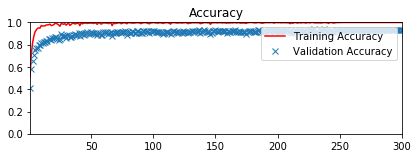

Training accuracies: 
[0.51142274214757644, 0.7206528924580925, 0.81565562238905354, 0.87505388092544556, 0.91580217834341004, 0.9335038364027769, 0.94778585596678466, 0.95120549449640024, 0.94928015177988279, 0.9729302566336977, 0.96853357863674916, 0.9697979827691654, 0.97017155670531163, 0.97827523786270254, 0.97767177221161794, 0.98014310762907519, 0.98511451478490764, 0.97244173688290292, 0.97525790972717741, 0.98017184405276281, 0.99137906261674191, 0.99226989281301192, 0.98591913562447331, 0.97772924514463455, 0.96637834422242153, 0.98948245642668164, 0.98787321474755019, 0.98425242104658184, 0.99025834075691832, 0.97620621283933584, 0.98764332308399672, 0.99385039801707076, 0.97387855972872783, 0.98247076065404182, 0.99272967614011898, 0.99258599385039803, 0.98715480333320194, 0.9902008678410299, 0.99287335842983993, 0.99505732923359869, 0.97186700767263423, 0.99560332193453838, 0.9876433231011249, 0.99290209488778414, 0.99428144486910541, 0.99531595735509637, 0.991436535532630

Test Accuracy = 0.926
All done for cropped_data...
Working on cropped_normalized_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/cropped_normalized_data_0...


Epoch:   0%|          | 1/300 [00:03<19:17,  3.87s/epochs]

Model saved at: ./data/cropped_normalized_data_1...


Epoch:   1%|          | 2/300 [00:07<19:11,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_2...


Epoch:   1%|          | 3/300 [00:11<19:04,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_3...


Epoch:   1%|▏         | 4/300 [00:15<19:06,  3.87s/epochs]

Model saved at: ./data/cropped_normalized_data_4...


Epoch:   2%|▏         | 5/300 [00:19<19:00,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_5...


Epoch:   2%|▏         | 6/300 [00:23<18:54,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_6...


Epoch:   2%|▏         | 7/300 [00:26<18:48,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_7...


Epoch:   3%|▎         | 8/300 [00:30<18:43,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_8...


Epoch:   3%|▎         | 9/300 [00:34<18:40,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_9...


Epoch:   3%|▎         | 10/300 [00:38<18:35,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_10...


Epoch:   4%|▎         | 11/300 [00:42<18:31,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_11...


Epoch:   4%|▍         | 12/300 [00:46<18:27,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_12...


Epoch:   4%|▍         | 13/300 [00:50<18:19,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_13...


Epoch:   5%|▍         | 14/300 [00:53<18:15,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_14...


Epoch:   5%|▌         | 15/300 [00:57<18:11,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_15...


Epoch:   5%|▌         | 16/300 [01:01<18:07,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_16...


Epoch:   6%|▌         | 17/300 [01:05<18:04,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_17...


Epoch:   6%|▌         | 18/300 [01:09<18:02,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_18...


Epoch:   6%|▋         | 19/300 [01:13<17:58,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_19...


Epoch:   7%|▋         | 20/300 [01:16<17:53,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_20...


Epoch:   7%|▋         | 21/300 [01:20<17:48,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_21...


Epoch:   7%|▋         | 22/300 [01:24<17:43,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_22...


Epoch:   8%|▊         | 23/300 [01:28<17:39,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_23...


Epoch:   8%|▊         | 24/300 [01:32<17:38,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_24...


Epoch:   8%|▊         | 25/300 [01:36<17:34,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_25...


Epoch:   9%|▊         | 26/300 [01:39<17:31,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_26...


Epoch:   9%|▉         | 27/300 [01:43<17:28,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_27...


Epoch:   9%|▉         | 28/300 [01:47<17:24,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_28...


Epoch:  10%|▉         | 29/300 [01:51<17:21,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_29...


Epoch:  10%|█         | 30/300 [01:55<17:18,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_30...


Epoch:  10%|█         | 31/300 [01:59<17:13,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_31...


Epoch:  11%|█         | 32/300 [02:02<17:09,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_32...


Epoch:  11%|█         | 33/300 [02:06<17:05,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_33...


Epoch:  11%|█▏        | 34/300 [02:10<17:02,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_34...


Epoch:  12%|█▏        | 35/300 [02:14<16:58,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_35...


Epoch:  12%|█▏        | 36/300 [02:18<16:53,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_36...


Epoch:  12%|█▏        | 37/300 [02:22<16:50,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_37...


Epoch:  13%|█▎        | 38/300 [02:25<16:46,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_38...


Epoch:  13%|█▎        | 39/300 [02:29<16:42,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_39...


Epoch:  13%|█▎        | 40/300 [02:33<16:39,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_40...


Epoch:  14%|█▎        | 41/300 [02:37<16:36,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_41...


Epoch:  14%|█▍        | 42/300 [02:41<16:30,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_42...


Epoch:  14%|█▍        | 43/300 [02:45<16:27,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_43...


Epoch:  15%|█▍        | 44/300 [02:49<16:22,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_44...


Epoch:  15%|█▌        | 45/300 [02:52<16:18,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_45...


Epoch:  15%|█▌        | 46/300 [02:56<16:15,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_46...


Epoch:  16%|█▌        | 47/300 [03:00<16:12,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_47...


Epoch:  16%|█▌        | 48/300 [03:04<16:08,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_48...


Epoch:  16%|█▋        | 49/300 [03:08<16:05,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_49...


Epoch:  17%|█▋        | 50/300 [03:12<16:00,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_50...


Epoch:  17%|█▋        | 51/300 [03:15<15:55,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_51...


Epoch:  17%|█▋        | 52/300 [03:19<15:52,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_52...


Epoch:  18%|█▊        | 53/300 [03:23<15:49,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_53...


Epoch:  18%|█▊        | 54/300 [03:27<15:45,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_54...


Epoch:  18%|█▊        | 55/300 [03:31<15:41,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_55...


Epoch:  19%|█▊        | 56/300 [03:35<15:38,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_56...


Epoch:  19%|█▉        | 57/300 [03:38<15:33,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_57...


Epoch:  19%|█▉        | 58/300 [03:42<15:29,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_58...


Epoch:  20%|█▉        | 59/300 [03:46<15:26,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_59...


Epoch:  20%|██        | 60/300 [03:50<15:22,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_60...


Epoch:  20%|██        | 61/300 [03:54<15:18,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_61...


Epoch:  21%|██        | 62/300 [03:58<15:14,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_62...


Epoch:  21%|██        | 63/300 [04:02<15:10,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_63...


Epoch:  21%|██▏       | 64/300 [04:05<15:07,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_64...


Epoch:  22%|██▏       | 65/300 [04:09<15:03,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_65...


Epoch:  22%|██▏       | 66/300 [04:13<15:00,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_66...


Epoch:  22%|██▏       | 67/300 [04:17<14:55,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_67...


Epoch:  23%|██▎       | 68/300 [04:21<14:51,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_68...


Epoch:  23%|██▎       | 69/300 [04:25<14:47,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_69...


Epoch:  23%|██▎       | 70/300 [04:28<14:43,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_70...


Epoch:  24%|██▎       | 71/300 [04:32<14:40,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_71...


Epoch:  24%|██▍       | 72/300 [04:36<14:37,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_72...


Epoch:  24%|██▍       | 73/300 [04:40<14:32,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_73...


Epoch:  25%|██▍       | 74/300 [04:44<14:29,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_74...


Epoch:  25%|██▌       | 75/300 [04:48<14:25,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_75...


Epoch:  25%|██▌       | 76/300 [04:52<14:21,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_76...


Epoch:  26%|██▌       | 77/300 [04:55<14:17,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_77...


Epoch:  26%|██▌       | 78/300 [04:59<14:13,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_78...


Epoch:  26%|██▋       | 79/300 [05:03<14:09,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_79...


Epoch:  27%|██▋       | 80/300 [05:07<14:05,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_80...


Epoch:  27%|██▋       | 81/300 [05:11<14:01,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_81...


Epoch:  27%|██▋       | 82/300 [05:15<13:57,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_82...


Epoch:  28%|██▊       | 83/300 [05:18<13:53,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_83...


Epoch:  28%|██▊       | 84/300 [05:22<13:49,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_84...


Epoch:  28%|██▊       | 85/300 [05:26<13:46,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_85...


Epoch:  29%|██▊       | 86/300 [05:30<13:42,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_86...


Epoch:  29%|██▉       | 87/300 [05:34<13:39,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_87...


Epoch:  29%|██▉       | 88/300 [05:38<13:35,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_88...


Epoch:  30%|██▉       | 89/300 [05:42<13:31,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_89...


Epoch:  30%|███       | 90/300 [05:45<13:27,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_90...


Epoch:  30%|███       | 91/300 [05:49<13:23,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_91...


Epoch:  31%|███       | 92/300 [05:53<13:20,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_92...


Epoch:  31%|███       | 93/300 [05:57<13:16,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_93...


Epoch:  31%|███▏      | 94/300 [06:01<13:12,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_94...


Epoch:  32%|███▏      | 95/300 [06:05<13:07,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_95...


Epoch:  32%|███▏      | 96/300 [06:08<13:03,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_96...


Epoch:  32%|███▏      | 97/300 [06:12<13:00,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_97...


Epoch:  33%|███▎      | 98/300 [06:16<12:57,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_98...


Epoch:  33%|███▎      | 99/300 [06:20<12:53,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_99...


Epoch:  33%|███▎      | 100/300 [06:24<12:49,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_100...


Epoch:  34%|███▎      | 101/300 [06:28<12:45,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_101...


Epoch:  34%|███▍      | 102/300 [06:31<12:41,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_102...


Epoch:  34%|███▍      | 103/300 [06:35<12:38,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_103...


Epoch:  35%|███▍      | 104/300 [06:39<12:34,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_104...


Epoch:  35%|███▌      | 105/300 [06:43<12:29,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_105...


Epoch:  35%|███▌      | 106/300 [06:47<12:25,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_106...


Epoch:  36%|███▌      | 107/300 [06:51<12:21,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_107...


Epoch:  36%|███▌      | 108/300 [06:55<12:16,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_108...


Epoch:  36%|███▋      | 109/300 [06:58<12:13,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_109...


Epoch:  37%|███▋      | 110/300 [07:02<12:10,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_110...


Epoch:  37%|███▋      | 111/300 [07:06<12:07,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_111...


Epoch:  37%|███▋      | 112/300 [07:10<12:03,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_112...


Epoch:  38%|███▊      | 113/300 [07:14<11:59,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_113...


Epoch:  38%|███▊      | 114/300 [07:18<11:55,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_114...


Epoch:  38%|███▊      | 115/300 [07:21<11:50,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_115...


Epoch:  39%|███▊      | 116/300 [07:25<11:47,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_116...


Epoch:  39%|███▉      | 117/300 [07:29<11:43,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_117...


Epoch:  39%|███▉      | 118/300 [07:33<11:40,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_118...


Epoch:  40%|███▉      | 119/300 [07:37<11:37,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_119...


Epoch:  40%|████      | 120/300 [07:41<11:32,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_120...


Epoch:  40%|████      | 121/300 [07:45<11:28,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_121...


Epoch:  41%|████      | 122/300 [07:48<11:24,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_122...


Epoch:  41%|████      | 123/300 [07:52<11:20,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_123...


Epoch:  41%|████▏     | 124/300 [07:56<11:16,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_124...


Epoch:  42%|████▏     | 125/300 [08:00<11:12,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_125...


Epoch:  42%|████▏     | 126/300 [08:04<11:09,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_126...


Epoch:  42%|████▏     | 127/300 [08:08<11:05,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_127...


Epoch:  43%|████▎     | 128/300 [08:11<11:01,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_128...


Epoch:  43%|████▎     | 129/300 [08:15<10:58,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_129...


Epoch:  43%|████▎     | 130/300 [08:19<10:54,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_130...


Epoch:  44%|████▎     | 131/300 [08:23<10:50,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_131...


Epoch:  44%|████▍     | 132/300 [08:27<10:46,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_132...


Epoch:  44%|████▍     | 133/300 [08:31<10:43,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_133...


Epoch:  45%|████▍     | 134/300 [08:35<10:40,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_134...


Epoch:  45%|████▌     | 135/300 [08:38<10:35,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_135...


Epoch:  45%|████▌     | 136/300 [08:42<10:31,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_136...


Epoch:  46%|████▌     | 137/300 [08:46<10:27,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_137...


Epoch:  46%|████▌     | 138/300 [08:50<10:23,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_138...


Epoch:  46%|████▋     | 139/300 [08:54<10:19,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_139...


Epoch:  47%|████▋     | 140/300 [08:58<10:16,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_140...


Epoch:  47%|████▋     | 141/300 [09:02<10:11,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_141...


Epoch:  47%|████▋     | 142/300 [09:05<10:07,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_142...


Epoch:  48%|████▊     | 143/300 [09:09<10:04,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_143...


Epoch:  48%|████▊     | 144/300 [09:13<10:00,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_144...


Epoch:  48%|████▊     | 145/300 [09:17<09:56,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_145...


Epoch:  49%|████▊     | 146/300 [09:21<09:52,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_146...


Epoch:  49%|████▉     | 147/300 [09:25<09:49,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_147...


Epoch:  49%|████▉     | 148/300 [09:28<09:44,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_148...


Epoch:  50%|████▉     | 149/300 [09:32<09:40,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_149...


Epoch:  50%|█████     | 150/300 [09:36<09:36,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_150...


Epoch:  50%|█████     | 151/300 [09:40<09:33,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_151...


Epoch:  51%|█████     | 152/300 [09:44<09:29,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_152...


Epoch:  51%|█████     | 153/300 [09:48<09:25,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_153...


Epoch:  51%|█████▏    | 154/300 [09:52<09:21,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_154...


Epoch:  52%|█████▏    | 155/300 [09:55<09:17,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_155...


Epoch:  52%|█████▏    | 156/300 [09:59<09:13,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_156...


Epoch:  52%|█████▏    | 157/300 [10:03<09:10,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_157...


Epoch:  53%|█████▎    | 158/300 [10:07<09:06,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_158...


Epoch:  53%|█████▎    | 159/300 [10:11<09:02,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_159...


Epoch:  53%|█████▎    | 160/300 [10:15<08:58,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_160...


Epoch:  54%|█████▎    | 161/300 [10:18<08:54,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_161...


Epoch:  54%|█████▍    | 162/300 [10:22<08:51,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_162...


Epoch:  54%|█████▍    | 163/300 [10:26<08:47,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_163...


Epoch:  55%|█████▍    | 164/300 [10:30<08:43,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_164...


Epoch:  55%|█████▌    | 165/300 [10:34<08:40,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_165...


Epoch:  55%|█████▌    | 166/300 [10:38<08:36,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_166...


Epoch:  56%|█████▌    | 167/300 [10:42<08:32,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_167...


Epoch:  56%|█████▌    | 168/300 [10:45<08:28,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_168...


Epoch:  56%|█████▋    | 169/300 [10:49<08:24,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_169...


Epoch:  57%|█████▋    | 170/300 [10:53<08:21,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_170...


Epoch:  57%|█████▋    | 171/300 [10:57<08:17,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_171...


Epoch:  57%|█████▋    | 172/300 [11:01<08:13,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_172...


Epoch:  58%|█████▊    | 173/300 [11:05<08:09,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_173...


Epoch:  58%|█████▊    | 174/300 [11:09<08:05,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_174...


Epoch:  58%|█████▊    | 175/300 [11:12<08:01,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_175...


Epoch:  59%|█████▊    | 176/300 [11:16<07:57,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_176...


Epoch:  59%|█████▉    | 177/300 [11:20<07:53,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_177...


Epoch:  59%|█████▉    | 178/300 [11:24<07:49,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_178...


Epoch:  60%|█████▉    | 179/300 [11:28<07:46,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_179...


Epoch:  60%|██████    | 180/300 [11:32<07:42,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_180...


Epoch:  60%|██████    | 181/300 [11:36<07:37,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_181...


Epoch:  61%|██████    | 182/300 [11:39<07:34,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_182...


Epoch:  61%|██████    | 183/300 [11:43<07:30,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_183...


Epoch:  61%|██████▏   | 184/300 [11:47<07:27,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_184...


Epoch:  62%|██████▏   | 185/300 [11:51<07:22,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_185...


Epoch:  62%|██████▏   | 186/300 [11:55<07:19,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_186...


Epoch:  62%|██████▏   | 187/300 [11:59<07:15,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_187...


Epoch:  63%|██████▎   | 188/300 [12:03<07:11,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_188...


Epoch:  63%|██████▎   | 189/300 [12:06<07:07,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_189...


Epoch:  63%|██████▎   | 190/300 [12:10<07:03,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_190...


Epoch:  64%|██████▎   | 191/300 [12:14<06:59,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_191...


Epoch:  64%|██████▍   | 192/300 [12:18<06:55,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_192...


Epoch:  64%|██████▍   | 193/300 [12:22<06:52,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_193...


Epoch:  65%|██████▍   | 194/300 [12:26<06:47,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_194...


Epoch:  65%|██████▌   | 195/300 [12:29<06:43,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_195...


Epoch:  65%|██████▌   | 196/300 [12:33<06:40,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_196...


Epoch:  66%|██████▌   | 197/300 [12:37<06:37,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_197...


Epoch:  66%|██████▌   | 198/300 [12:41<06:34,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_198...


Epoch:  66%|██████▋   | 199/300 [12:45<06:30,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_199...


Epoch:  67%|██████▋   | 200/300 [12:49<06:26,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_200...


Epoch:  67%|██████▋   | 201/300 [12:53<06:22,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_201...


Epoch:  67%|██████▋   | 202/300 [12:56<06:17,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_202...


Epoch:  68%|██████▊   | 203/300 [13:00<06:13,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_203...


Epoch:  68%|██████▊   | 204/300 [13:04<06:10,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_204...


Epoch:  68%|██████▊   | 205/300 [13:08<06:06,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_205...


Epoch:  69%|██████▊   | 206/300 [13:12<06:01,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_206...


Epoch:  69%|██████▉   | 207/300 [13:16<05:57,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_207...


Epoch:  69%|██████▉   | 208/300 [13:20<05:53,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_208...


Epoch:  70%|██████▉   | 209/300 [13:23<05:49,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_209...


Epoch:  70%|███████   | 210/300 [13:27<05:45,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_210...


Epoch:  70%|███████   | 211/300 [13:31<05:41,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_211...


Epoch:  71%|███████   | 212/300 [13:35<05:37,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_212...


Epoch:  71%|███████   | 213/300 [13:39<05:33,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_213...


Epoch:  71%|███████▏  | 214/300 [13:43<05:29,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_214...


Epoch:  72%|███████▏  | 215/300 [13:46<05:25,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_215...


Epoch:  72%|███████▏  | 216/300 [13:50<05:21,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_216...


Epoch:  72%|███████▏  | 217/300 [13:54<05:17,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_217...


Epoch:  73%|███████▎  | 218/300 [13:58<05:13,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_218...


Epoch:  73%|███████▎  | 219/300 [14:02<05:10,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_219...


Epoch:  73%|███████▎  | 220/300 [14:06<05:06,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_220...


Epoch:  74%|███████▎  | 221/300 [14:09<05:03,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_221...


Epoch:  74%|███████▍  | 222/300 [14:13<04:59,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_222...


Epoch:  74%|███████▍  | 223/300 [14:17<04:55,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_223...


Epoch:  75%|███████▍  | 224/300 [14:21<04:51,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_224...


Epoch:  75%|███████▌  | 225/300 [14:25<04:47,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_225...


Epoch:  75%|███████▌  | 226/300 [14:29<04:43,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_226...


Epoch:  76%|███████▌  | 227/300 [14:32<04:39,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_227...


Epoch:  76%|███████▌  | 228/300 [14:36<04:36,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_228...


Epoch:  76%|███████▋  | 229/300 [14:40<04:33,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_229...


Epoch:  77%|███████▋  | 230/300 [14:44<04:29,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_230...


Epoch:  77%|███████▋  | 231/300 [14:48<04:25,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_231...


Epoch:  77%|███████▋  | 232/300 [14:52<04:21,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_232...


Epoch:  78%|███████▊  | 233/300 [14:55<04:17,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_233...


Epoch:  78%|███████▊  | 234/300 [14:59<04:13,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_234...


Epoch:  78%|███████▊  | 235/300 [15:03<04:10,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_235...


Epoch:  79%|███████▊  | 236/300 [15:07<04:06,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_236...


Epoch:  79%|███████▉  | 237/300 [15:11<04:02,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_237...


Epoch:  79%|███████▉  | 238/300 [15:15<03:58,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_238...


Epoch:  80%|███████▉  | 239/300 [15:19<03:54,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_239...


Epoch:  80%|████████  | 240/300 [15:22<03:50,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_240...


Epoch:  80%|████████  | 241/300 [15:26<03:46,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_241...


Epoch:  81%|████████  | 242/300 [15:30<03:42,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_242...


Epoch:  81%|████████  | 243/300 [15:34<03:39,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_243...


Epoch:  81%|████████▏ | 244/300 [15:38<03:35,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_244...


Epoch:  82%|████████▏ | 245/300 [15:42<03:31,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_245...


Epoch:  82%|████████▏ | 246/300 [15:45<03:27,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_246...


Epoch:  82%|████████▏ | 247/300 [15:49<03:23,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_247...


Epoch:  83%|████████▎ | 248/300 [15:53<03:19,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_248...


Epoch:  83%|████████▎ | 249/300 [15:57<03:15,  3.82s/epochs]

Model saved at: ./data/cropped_normalized_data_249...


Epoch:  83%|████████▎ | 250/300 [16:01<03:11,  3.82s/epochs]

Model saved at: ./data/cropped_normalized_data_250...


Epoch:  84%|████████▎ | 251/300 [16:05<03:07,  3.83s/epochs]

Model saved at: ./data/cropped_normalized_data_251...


Epoch:  84%|████████▍ | 252/300 [16:08<03:04,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_252...


Epoch:  84%|████████▍ | 253/300 [16:12<03:00,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_253...


Epoch:  85%|████████▍ | 254/300 [16:16<02:56,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_254...


Epoch:  85%|████████▌ | 255/300 [16:20<02:53,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_255...


Epoch:  85%|████████▌ | 256/300 [16:24<02:49,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_256...


Epoch:  86%|████████▌ | 257/300 [16:28<02:45,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_257...


Epoch:  86%|████████▌ | 258/300 [16:32<02:41,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_258...


Epoch:  86%|████████▋ | 259/300 [16:35<02:38,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_259...


Epoch:  87%|████████▋ | 260/300 [16:39<02:34,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_260...


Epoch:  87%|████████▋ | 261/300 [16:43<02:30,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_261...


Epoch:  87%|████████▋ | 262/300 [16:47<02:26,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_262...


Epoch:  88%|████████▊ | 263/300 [16:51<02:22,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_263...


Epoch:  88%|████████▊ | 264/300 [16:55<02:18,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_264...


Epoch:  88%|████████▊ | 265/300 [16:59<02:14,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_265...


Epoch:  89%|████████▊ | 266/300 [17:02<02:11,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_266...


Epoch:  89%|████████▉ | 267/300 [17:06<02:07,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_267...


Epoch:  89%|████████▉ | 268/300 [17:10<02:03,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_268...


Epoch:  90%|████████▉ | 269/300 [17:14<01:59,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_269...


Epoch:  90%|█████████ | 270/300 [17:18<01:55,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_270...


Epoch:  90%|█████████ | 271/300 [17:22<01:51,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_271...


Epoch:  91%|█████████ | 272/300 [17:26<01:47,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_272...


Epoch:  91%|█████████ | 273/300 [17:29<01:44,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_273...


Epoch:  91%|█████████▏| 274/300 [17:33<01:40,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_274...


Epoch:  92%|█████████▏| 275/300 [17:37<01:36,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_275...


Epoch:  92%|█████████▏| 276/300 [17:41<01:32,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_276...


Epoch:  92%|█████████▏| 277/300 [17:45<01:28,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_277...


Epoch:  93%|█████████▎| 278/300 [17:49<01:24,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_278...


Epoch:  93%|█████████▎| 279/300 [17:52<01:20,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_279...


Epoch:  93%|█████████▎| 280/300 [17:56<01:16,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_280...


Epoch:  94%|█████████▎| 281/300 [18:00<01:13,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_281...


Epoch:  94%|█████████▍| 282/300 [18:04<01:09,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_282...


Epoch:  94%|█████████▍| 283/300 [18:08<01:05,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_283...


Epoch:  95%|█████████▍| 284/300 [18:12<01:01,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_284...


Epoch:  95%|█████████▌| 285/300 [18:16<00:57,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_285...


Epoch:  95%|█████████▌| 286/300 [18:19<00:53,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_286...


Epoch:  96%|█████████▌| 287/300 [18:23<00:50,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_287...


Epoch:  96%|█████████▌| 288/300 [18:27<00:46,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_288...


Epoch:  96%|█████████▋| 289/300 [18:31<00:42,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_289...


Epoch:  97%|█████████▋| 290/300 [18:35<00:38,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_290...


Epoch:  97%|█████████▋| 291/300 [18:39<00:34,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_291...


Epoch:  97%|█████████▋| 292/300 [18:43<00:30,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_292...


Epoch:  98%|█████████▊| 293/300 [18:46<00:26,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_293...


Epoch:  98%|█████████▊| 294/300 [18:50<00:23,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_294...


Epoch:  98%|█████████▊| 295/300 [18:54<00:19,  3.86s/epochs]

Model saved at: ./data/cropped_normalized_data_295...


Epoch:  99%|█████████▊| 296/300 [18:58<00:15,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_296...


Epoch:  99%|█████████▉| 297/300 [19:02<00:11,  3.84s/epochs]

Model saved at: ./data/cropped_normalized_data_297...


Epoch:  99%|█████████▉| 298/300 [19:06<00:07,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_298...


Epoch: 100%|█████████▉| 299/300 [19:10<00:03,  3.85s/epochs]

Model saved at: ./data/cropped_normalized_data_299...


Epoch: 100%|██████████| 300/300 [19:13<00:00,  3.85s/epochs]


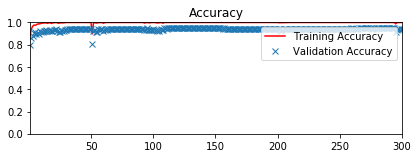

Training accuracies: 
[0.88275525170587432, 0.94057300515981812, 0.96453921096537787, 0.97623494938292132, 0.97511422742032816, 0.97882123051225745, 0.98669501998896658, 0.98678122936279911, 0.98968361159803442, 0.99152274490646286, 0.99514353862455951, 0.99522974798126385, 0.99727003649530155, 0.99606310526164543, 0.99298830426161666, 0.99597689588781291, 0.99876433230839967, 0.99169516365412802, 0.99534469381304058, 0.99790223857007387, 0.99839075835512514, 0.99991379062616736, 0.99660909796258512, 0.99278714907313559, 0.99635046984108744, 0.99735624586913418, 0.99658036150464091, 0.99658036150464091, 0.99804592087692312, 0.99979884479439063, 0.99991379062616736, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.89821546604730684, 0.99545963964481743, 0.99813213023362746, 0.99589068651398027, 0.9950860656915429, 0.99867812293456704, 0.99830454898129262, 0.99979884479439063, 0.99873559585045546, 0.99336187821489119, 0.99790223858720206, 0

Test Accuracy = 0.937
All done for cropped_normalized_data...
Working on cropped_grayscale_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/cropped_grayscale_data_0...


Epoch:   0%|          | 1/300 [00:02<14:41,  2.95s/epochs]

Model saved at: ./data/cropped_grayscale_data_1...


Epoch:   1%|          | 2/300 [00:05<14:32,  2.93s/epochs]

Model saved at: ./data/cropped_grayscale_data_2...


Epoch:   1%|          | 3/300 [00:08<14:24,  2.91s/epochs]

Model saved at: ./data/cropped_grayscale_data_3...


Epoch:   1%|▏         | 4/300 [00:11<14:25,  2.92s/epochs]

Model saved at: ./data/cropped_grayscale_data_4...


Epoch:   2%|▏         | 5/300 [00:14<14:19,  2.91s/epochs]

Model saved at: ./data/cropped_grayscale_data_5...


Epoch:   2%|▏         | 6/300 [00:17<14:13,  2.90s/epochs]

Model saved at: ./data/cropped_grayscale_data_6...


Epoch:   2%|▏         | 7/300 [00:20<14:07,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_7...


Epoch:   3%|▎         | 8/300 [00:23<14:03,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_8...


Epoch:   3%|▎         | 9/300 [00:26<14:00,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_9...


Epoch:   3%|▎         | 10/300 [00:28<13:56,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_10...


Epoch:   4%|▎         | 11/300 [00:31<13:53,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_11...


Epoch:   4%|▍         | 12/300 [00:34<13:50,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_12...


Epoch:   4%|▍         | 13/300 [00:37<13:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_13...


Epoch:   5%|▍         | 14/300 [00:40<13:43,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_14...


Epoch:   5%|▌         | 15/300 [00:43<13:41,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_15...


Epoch:   5%|▌         | 16/300 [00:46<13:37,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_16...


Epoch:   6%|▌         | 17/300 [00:49<13:34,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_17...


Epoch:   6%|▌         | 18/300 [00:51<13:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_18...


Epoch:   6%|▋         | 19/300 [00:54<13:29,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_19...


Epoch:   7%|▋         | 20/300 [00:57<13:26,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_20...


Epoch:   7%|▋         | 21/300 [01:00<13:23,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_21...


Epoch:   7%|▋         | 22/300 [01:03<13:19,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_22...


Epoch:   8%|▊         | 23/300 [01:06<13:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_23...


Epoch:   8%|▊         | 24/300 [01:09<13:12,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_24...


Epoch:   8%|▊         | 25/300 [01:12<13:10,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_25...


Epoch:   9%|▊         | 26/300 [01:14<13:09,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_26...


Epoch:   9%|▉         | 27/300 [01:17<13:09,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_27...


Epoch:   9%|▉         | 28/300 [01:20<13:05,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_28...


Epoch:  10%|▉         | 29/300 [01:23<13:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_29...


Epoch:  10%|█         | 30/300 [01:26<12:58,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_30...


Epoch:  10%|█         | 31/300 [01:29<12:55,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_31...


Epoch:  11%|█         | 32/300 [01:32<12:50,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_32...


Epoch:  11%|█         | 33/300 [01:35<12:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_33...


Epoch:  11%|█▏        | 34/300 [01:38<12:43,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_34...


Epoch:  12%|█▏        | 35/300 [01:40<12:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_35...


Epoch:  12%|█▏        | 36/300 [01:43<12:37,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_36...


Epoch:  12%|█▏        | 37/300 [01:46<12:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_37...


Epoch:  13%|█▎        | 38/300 [01:49<12:32,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_38...


Epoch:  13%|█▎        | 39/300 [01:52<12:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_39...


Epoch:  13%|█▎        | 40/300 [01:55<12:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_40...


Epoch:  14%|█▎        | 41/300 [01:58<12:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_41...


Epoch:  14%|█▍        | 42/300 [02:00<12:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_42...


Epoch:  14%|█▍        | 43/300 [02:03<12:17,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_43...


Epoch:  15%|█▍        | 44/300 [02:06<12:14,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_44...


Epoch:  15%|█▌        | 45/300 [02:09<12:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_45...


Epoch:  15%|█▌        | 46/300 [02:12<12:08,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_46...


Epoch:  16%|█▌        | 47/300 [02:15<12:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_47...


Epoch:  16%|█▌        | 48/300 [02:18<12:03,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_48...


Epoch:  16%|█▋        | 49/300 [02:21<12:00,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_49...


Epoch:  17%|█▋        | 50/300 [02:23<11:57,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_50...


Epoch:  17%|█▋        | 51/300 [02:26<11:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_51...


Epoch:  17%|█▋        | 52/300 [02:29<11:51,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_52...


Epoch:  18%|█▊        | 53/300 [02:32<11:48,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_53...


Epoch:  18%|█▊        | 54/300 [02:35<11:45,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_54...


Epoch:  18%|█▊        | 55/300 [02:38<11:42,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_55...


Epoch:  19%|█▊        | 56/300 [02:41<11:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_56...


Epoch:  19%|█▉        | 57/300 [02:44<11:38,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_57...


Epoch:  19%|█▉        | 58/300 [02:46<11:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_58...


Epoch:  20%|█▉        | 59/300 [02:49<11:32,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_59...


Epoch:  20%|██        | 60/300 [02:52<11:30,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_60...


Epoch:  20%|██        | 61/300 [02:55<11:26,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_61...


Epoch:  21%|██        | 62/300 [02:58<11:23,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_62...


Epoch:  21%|██        | 63/300 [03:01<11:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_63...


Epoch:  21%|██▏       | 64/300 [03:04<11:17,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_64...


Epoch:  22%|██▏       | 65/300 [03:06<11:14,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_65...


Epoch:  22%|██▏       | 66/300 [03:09<11:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_66...


Epoch:  22%|██▏       | 67/300 [03:12<11:08,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_67...


Epoch:  23%|██▎       | 68/300 [03:15<11:08,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_68...


Epoch:  23%|██▎       | 69/300 [03:18<11:05,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_69...


Epoch:  23%|██▎       | 70/300 [03:21<11:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_70...


Epoch:  24%|██▎       | 71/300 [03:24<10:57,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_71...


Epoch:  24%|██▍       | 72/300 [03:27<10:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_72...


Epoch:  24%|██▍       | 73/300 [03:29<10:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_73...


Epoch:  25%|██▍       | 74/300 [03:32<10:49,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_74...


Epoch:  25%|██▌       | 75/300 [03:35<10:46,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_75...


Epoch:  25%|██▌       | 76/300 [03:38<10:43,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_76...


Epoch:  26%|██▌       | 77/300 [03:41<10:40,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_77...


Epoch:  26%|██▌       | 78/300 [03:44<10:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_78...


Epoch:  26%|██▋       | 79/300 [03:47<10:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_79...


Epoch:  27%|██▋       | 80/300 [03:50<10:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_80...


Epoch:  27%|██▋       | 81/300 [03:52<10:29,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_81...


Epoch:  27%|██▋       | 82/300 [03:55<10:27,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_82...


Epoch:  28%|██▊       | 83/300 [03:58<10:24,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_83...


Epoch:  28%|██▊       | 84/300 [04:01<10:22,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_84...


Epoch:  28%|██▊       | 85/300 [04:04<10:18,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_85...


Epoch:  29%|██▊       | 86/300 [04:07<10:14,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_86...


Epoch:  29%|██▉       | 87/300 [04:10<10:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_87...


Epoch:  29%|██▉       | 88/300 [04:13<10:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_88...


Epoch:  30%|██▉       | 89/300 [04:15<10:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_89...


Epoch:  30%|███       | 90/300 [04:18<10:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_90...


Epoch:  30%|███       | 91/300 [04:21<10:00,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_91...


Epoch:  31%|███       | 92/300 [04:24<09:59,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_92...


Epoch:  31%|███       | 93/300 [04:27<09:56,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_93...


Epoch:  31%|███▏      | 94/300 [04:30<09:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_94...


Epoch:  32%|███▏      | 95/300 [04:33<09:48,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_95...


Epoch:  32%|███▏      | 96/300 [04:36<09:45,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_96...


Epoch:  32%|███▏      | 97/300 [04:38<09:42,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_97...


Epoch:  33%|███▎      | 98/300 [04:41<09:40,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_98...


Epoch:  33%|███▎      | 99/300 [04:44<09:37,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_99...


Epoch:  33%|███▎      | 100/300 [04:47<09:34,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_100...


Epoch:  34%|███▎      | 101/300 [04:50<09:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_101...


Epoch:  34%|███▍      | 102/300 [04:53<09:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_102...


Epoch:  34%|███▍      | 103/300 [04:56<09:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_103...


Epoch:  35%|███▍      | 104/300 [04:59<09:23,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_104...


Epoch:  35%|███▌      | 105/300 [05:01<09:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_105...


Epoch:  35%|███▌      | 106/300 [05:04<09:17,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_106...


Epoch:  36%|███▌      | 107/300 [05:07<09:14,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_107...


Epoch:  36%|███▌      | 108/300 [05:10<09:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_108...


Epoch:  36%|███▋      | 109/300 [05:13<09:08,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_109...


Epoch:  37%|███▋      | 110/300 [05:16<09:07,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_110...


Epoch:  37%|███▋      | 111/300 [05:19<09:04,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_111...


Epoch:  37%|███▋      | 112/300 [05:22<09:00,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_112...


Epoch:  38%|███▊      | 113/300 [05:24<08:57,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_113...


Epoch:  38%|███▊      | 114/300 [05:27<08:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_114...


Epoch:  38%|███▊      | 115/300 [05:30<08:51,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_115...


Epoch:  39%|███▊      | 116/300 [05:33<08:48,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_116...


Epoch:  39%|███▉      | 117/300 [05:36<08:45,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_117...


Epoch:  39%|███▉      | 118/300 [05:39<08:42,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_118...


Epoch:  40%|███▉      | 119/300 [05:42<08:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_119...


Epoch:  40%|████      | 120/300 [05:45<08:37,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_120...


Epoch:  40%|████      | 121/300 [05:47<08:34,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_121...


Epoch:  41%|████      | 122/300 [05:50<08:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_122...


Epoch:  41%|████      | 123/300 [05:53<08:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_123...


Epoch:  41%|████▏     | 124/300 [05:56<08:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_124...


Epoch:  42%|████▏     | 125/300 [05:59<08:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_125...


Epoch:  42%|████▏     | 126/300 [06:02<08:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_126...


Epoch:  42%|████▏     | 127/300 [06:05<08:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_127...


Epoch:  43%|████▎     | 128/300 [06:07<08:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_128...


Epoch:  43%|████▎     | 129/300 [06:10<08:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_129...


Epoch:  43%|████▎     | 130/300 [06:13<08:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_130...


Epoch:  44%|████▎     | 131/300 [06:16<08:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_131...


Epoch:  44%|████▍     | 132/300 [06:19<08:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_132...


Epoch:  44%|████▍     | 133/300 [06:22<07:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_133...


Epoch:  45%|████▍     | 134/300 [06:25<07:55,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_134...


Epoch:  45%|████▌     | 135/300 [06:28<07:53,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_135...


Epoch:  45%|████▌     | 136/300 [06:30<07:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_136...


Epoch:  46%|████▌     | 137/300 [06:33<07:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_137...


Epoch:  46%|████▌     | 138/300 [06:36<07:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_138...


Epoch:  46%|████▋     | 139/300 [06:39<07:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_139...


Epoch:  47%|████▋     | 140/300 [06:42<07:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_140...


Epoch:  47%|████▋     | 141/300 [06:45<07:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_141...


Epoch:  47%|████▋     | 142/300 [06:48<07:32,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_142...


Epoch:  48%|████▊     | 143/300 [06:51<07:30,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_143...


Epoch:  48%|████▊     | 144/300 [06:53<07:27,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_144...


Epoch:  48%|████▊     | 145/300 [06:56<07:24,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_145...


Epoch:  49%|████▊     | 146/300 [06:59<07:21,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_146...


Epoch:  49%|████▉     | 147/300 [07:02<07:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_147...


Epoch:  49%|████▉     | 148/300 [07:05<07:15,  2.86s/epochs]

Model saved at: ./data/cropped_grayscale_data_148...


Epoch:  50%|████▉     | 149/300 [07:08<07:12,  2.86s/epochs]

Model saved at: ./data/cropped_grayscale_data_149...


Epoch:  50%|█████     | 150/300 [07:11<07:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_150...


Epoch:  50%|█████     | 151/300 [07:13<07:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_151...


Epoch:  51%|█████     | 152/300 [07:16<07:05,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_152...


Epoch:  51%|█████     | 153/300 [07:19<07:02,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_153...


Epoch:  51%|█████▏    | 154/300 [07:22<06:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_154...


Epoch:  52%|█████▏    | 155/300 [07:25<06:56,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_155...


Epoch:  52%|█████▏    | 156/300 [07:28<06:53,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_156...


Epoch:  52%|█████▏    | 157/300 [07:31<06:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_157...


Epoch:  53%|█████▎    | 158/300 [07:34<06:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_158...


Epoch:  53%|█████▎    | 159/300 [07:36<06:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_159...


Epoch:  53%|█████▎    | 160/300 [07:39<06:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_160...


Epoch:  54%|█████▎    | 161/300 [07:42<06:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_161...


Epoch:  54%|█████▍    | 162/300 [07:45<06:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_162...


Epoch:  54%|█████▍    | 163/300 [07:48<06:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_163...


Epoch:  55%|█████▍    | 164/300 [07:51<06:30,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_164...


Epoch:  55%|█████▌    | 165/300 [07:54<06:27,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_165...


Epoch:  55%|█████▌    | 166/300 [07:57<06:24,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_166...


Epoch:  56%|█████▌    | 167/300 [07:59<06:21,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_167...


Epoch:  56%|█████▌    | 168/300 [08:02<06:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_168...


Epoch:  56%|█████▋    | 169/300 [08:05<06:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_169...


Epoch:  57%|█████▋    | 170/300 [08:08<06:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_170...


Epoch:  57%|█████▋    | 171/300 [08:11<06:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_171...


Epoch:  57%|█████▋    | 172/300 [08:14<06:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_172...


Epoch:  58%|█████▊    | 173/300 [08:17<06:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_173...


Epoch:  58%|█████▊    | 174/300 [08:20<06:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_174...


Epoch:  58%|█████▊    | 175/300 [08:22<05:58,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_175...


Epoch:  59%|█████▊    | 176/300 [08:25<05:56,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_176...


Epoch:  59%|█████▉    | 177/300 [08:28<05:53,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_177...


Epoch:  59%|█████▉    | 178/300 [08:31<05:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_178...


Epoch:  60%|█████▉    | 179/300 [08:34<05:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_179...


Epoch:  60%|██████    | 180/300 [08:37<05:45,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_180...


Epoch:  60%|██████    | 181/300 [08:40<05:42,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_181...


Epoch:  61%|██████    | 182/300 [08:43<05:39,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_182...


Epoch:  61%|██████    | 183/300 [08:45<05:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_183...


Epoch:  61%|██████▏   | 184/300 [08:48<05:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_184...


Epoch:  62%|██████▏   | 185/300 [08:51<05:30,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_185...


Epoch:  62%|██████▏   | 186/300 [08:54<05:27,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_186...


Epoch:  62%|██████▏   | 187/300 [08:57<05:24,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_187...


Epoch:  63%|██████▎   | 188/300 [09:00<05:20,  2.86s/epochs]

Model saved at: ./data/cropped_grayscale_data_188...


Epoch:  63%|██████▎   | 189/300 [09:03<05:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_189...


Epoch:  63%|██████▎   | 190/300 [09:05<05:16,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_190...


Epoch:  64%|██████▎   | 191/300 [09:08<05:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_191...


Epoch:  64%|██████▍   | 192/300 [09:11<05:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_192...


Epoch:  64%|██████▍   | 193/300 [09:14<05:07,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_193...


Epoch:  65%|██████▍   | 194/300 [09:17<05:05,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_194...


Epoch:  65%|██████▌   | 195/300 [09:20<05:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_195...


Epoch:  65%|██████▌   | 196/300 [09:23<04:58,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_196...


Epoch:  66%|██████▌   | 197/300 [09:26<04:55,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_197...


Epoch:  66%|██████▌   | 198/300 [09:28<04:53,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_198...


Epoch:  66%|██████▋   | 199/300 [09:31<04:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_199...


Epoch:  67%|██████▋   | 200/300 [09:34<04:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_200...


Epoch:  67%|██████▋   | 201/300 [09:37<04:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_201...


Epoch:  67%|██████▋   | 202/300 [09:40<04:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_202...


Epoch:  68%|██████▊   | 203/300 [09:43<04:38,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_203...


Epoch:  68%|██████▊   | 204/300 [09:46<04:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_204...


Epoch:  68%|██████▊   | 205/300 [09:49<04:32,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_205...


Epoch:  69%|██████▊   | 206/300 [09:51<04:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_206...


Epoch:  69%|██████▉   | 207/300 [09:54<04:26,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_207...


Epoch:  69%|██████▉   | 208/300 [09:57<04:24,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_208...


Epoch:  70%|██████▉   | 209/300 [10:00<04:21,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_209...


Epoch:  70%|███████   | 210/300 [10:03<04:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_210...


Epoch:  70%|███████   | 211/300 [10:06<04:15,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_211...


Epoch:  71%|███████   | 212/300 [10:09<04:12,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_212...


Epoch:  71%|███████   | 213/300 [10:12<04:09,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_213...


Epoch:  71%|███████▏  | 214/300 [10:14<04:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_214...


Epoch:  72%|███████▏  | 215/300 [10:17<04:04,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_215...


Epoch:  72%|███████▏  | 216/300 [10:20<04:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_216...


Epoch:  72%|███████▏  | 217/300 [10:23<03:58,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_217...


Epoch:  73%|███████▎  | 218/300 [10:26<03:55,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_218...


Epoch:  73%|███████▎  | 219/300 [10:29<03:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_219...


Epoch:  73%|███████▎  | 220/300 [10:32<03:49,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_220...


Epoch:  74%|███████▎  | 221/300 [10:35<03:46,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_221...


Epoch:  74%|███████▍  | 222/300 [10:37<03:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_222...


Epoch:  74%|███████▍  | 223/300 [10:40<03:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_223...


Epoch:  75%|███████▍  | 224/300 [10:43<03:38,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_224...


Epoch:  75%|███████▌  | 225/300 [10:46<03:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_225...


Epoch:  75%|███████▌  | 226/300 [10:49<03:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_226...


Epoch:  76%|███████▌  | 227/300 [10:52<03:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_227...


Epoch:  76%|███████▌  | 228/300 [10:55<03:26,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_228...


Epoch:  76%|███████▋  | 229/300 [10:58<03:23,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_229...


Epoch:  77%|███████▋  | 230/300 [11:00<03:21,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_230...


Epoch:  77%|███████▋  | 231/300 [11:03<03:18,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_231...


Epoch:  77%|███████▋  | 232/300 [11:06<03:15,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_232...


Epoch:  78%|███████▊  | 233/300 [11:09<03:12,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_233...


Epoch:  78%|███████▊  | 234/300 [11:12<03:09,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_234...


Epoch:  78%|███████▊  | 235/300 [11:15<03:06,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_235...


Epoch:  79%|███████▊  | 236/300 [11:18<03:04,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_236...


Epoch:  79%|███████▉  | 237/300 [11:21<03:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_237...


Epoch:  79%|███████▉  | 238/300 [11:23<02:58,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_238...


Epoch:  80%|███████▉  | 239/300 [11:26<02:55,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_239...


Epoch:  80%|████████  | 240/300 [11:29<02:52,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_240...


Epoch:  80%|████████  | 241/300 [11:32<02:49,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_241...


Epoch:  81%|████████  | 242/300 [11:35<02:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_242...


Epoch:  81%|████████  | 243/300 [11:38<02:43,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_243...


Epoch:  81%|████████▏ | 244/300 [11:41<02:41,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_244...


Epoch:  82%|████████▏ | 245/300 [11:44<02:38,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_245...


Epoch:  82%|████████▏ | 246/300 [11:46<02:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_246...


Epoch:  82%|████████▏ | 247/300 [11:49<02:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_247...


Epoch:  83%|████████▎ | 248/300 [11:52<02:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_248...


Epoch:  83%|████████▎ | 249/300 [11:55<02:26,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_249...


Epoch:  83%|████████▎ | 250/300 [11:58<02:23,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_250...


Epoch:  84%|████████▎ | 251/300 [12:01<02:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_251...


Epoch:  84%|████████▍ | 252/300 [12:04<02:17,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_252...


Epoch:  84%|████████▍ | 253/300 [12:07<02:15,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_253...


Epoch:  85%|████████▍ | 254/300 [12:09<02:12,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_254...


Epoch:  85%|████████▌ | 255/300 [12:12<02:09,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_255...


Epoch:  85%|████████▌ | 256/300 [12:15<02:06,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_256...


Epoch:  86%|████████▌ | 257/300 [12:18<02:03,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_257...


Epoch:  86%|████████▌ | 258/300 [12:21<02:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_258...


Epoch:  86%|████████▋ | 259/300 [12:24<01:57,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_259...


Epoch:  87%|████████▋ | 260/300 [12:27<01:55,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_260...


Epoch:  87%|████████▋ | 261/300 [12:30<01:52,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_261...


Epoch:  87%|████████▋ | 262/300 [12:32<01:49,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_262...


Epoch:  88%|████████▊ | 263/300 [12:35<01:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_263...


Epoch:  88%|████████▊ | 264/300 [12:38<01:43,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_264...


Epoch:  88%|████████▊ | 265/300 [12:41<01:40,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_265...


Epoch:  89%|████████▊ | 266/300 [12:44<01:37,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_266...


Epoch:  89%|████████▉ | 267/300 [12:47<01:34,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_267...


Epoch:  89%|████████▉ | 268/300 [12:50<01:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_268...


Epoch:  90%|████████▉ | 269/300 [12:53<01:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_269...


Epoch:  90%|█████████ | 270/300 [12:55<01:26,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_270...


Epoch:  90%|█████████ | 271/300 [12:58<01:23,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_271...


Epoch:  91%|█████████ | 272/300 [13:01<01:20,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_272...


Epoch:  91%|█████████ | 273/300 [13:04<01:17,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_273...


Epoch:  91%|█████████▏| 274/300 [13:07<01:14,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_274...


Epoch:  92%|█████████▏| 275/300 [13:10<01:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_275...


Epoch:  92%|█████████▏| 276/300 [13:13<01:08,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_276...


Epoch:  92%|█████████▏| 277/300 [13:16<01:06,  2.90s/epochs]

Model saved at: ./data/cropped_grayscale_data_277...


Epoch:  93%|█████████▎| 278/300 [13:19<01:03,  2.90s/epochs]

Model saved at: ./data/cropped_grayscale_data_278...


Epoch:  93%|█████████▎| 279/300 [13:21<01:00,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_279...


Epoch:  93%|█████████▎| 280/300 [13:24<00:57,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_280...


Epoch:  94%|█████████▎| 281/300 [13:27<00:54,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_281...


Epoch:  94%|█████████▍| 282/300 [13:30<00:51,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_282...


Epoch:  94%|█████████▍| 283/300 [13:33<00:48,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_283...


Epoch:  95%|█████████▍| 284/300 [13:36<00:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_284...


Epoch:  95%|█████████▌| 285/300 [13:39<00:43,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_285...


Epoch:  95%|█████████▌| 286/300 [13:42<00:40,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_286...


Epoch:  96%|█████████▌| 287/300 [13:44<00:37,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_287...


Epoch:  96%|█████████▌| 288/300 [13:47<00:34,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_288...


Epoch:  96%|█████████▋| 289/300 [13:50<00:31,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_289...


Epoch:  97%|█████████▋| 290/300 [13:53<00:28,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_290...


Epoch:  97%|█████████▋| 291/300 [13:56<00:25,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_291...


Epoch:  97%|█████████▋| 292/300 [13:59<00:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscale_data_292...


Epoch:  98%|█████████▊| 293/300 [14:02<00:20,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_293...


Epoch:  98%|█████████▊| 294/300 [14:05<00:17,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_294...


Epoch:  98%|█████████▊| 295/300 [14:07<00:14,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_295...


Epoch:  99%|█████████▊| 296/300 [14:10<00:11,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_296...


Epoch:  99%|█████████▉| 297/300 [14:13<00:08,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_297...


Epoch:  99%|█████████▉| 298/300 [14:16<00:05,  2.89s/epochs]

Model saved at: ./data/cropped_grayscale_data_298...


Epoch: 100%|█████████▉| 299/300 [14:19<00:02,  2.88s/epochs]

Model saved at: ./data/cropped_grayscale_data_299...


Epoch: 100%|██████████| 300/300 [14:22<00:00,  2.88s/epochs]


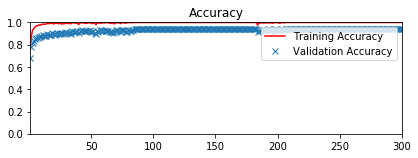

Training accuracies: 
[0.75263656994272821, 0.87568608305160267, 0.93040029904757349, 0.94568809455398672, 0.956837840236334, 0.96991292863519862, 0.96994166500750156, 0.9772694618175275, 0.97804534613063598, 0.97879249407144153, 0.98591913562447331, 0.98468346793287298, 0.98568924396091973, 0.98517198771792425, 0.99454007299060321, 0.9890801459983346, 0.99189631885973739, 0.99218368343917929, 0.99459754590649152, 0.98640765540952458, 0.99405155320555183, 0.99353429696255635, 0.99235610218684445, 0.9887640449438202, 0.99497111985976605, 0.9862065002039152, 0.98956866578338587, 0.98813184286904798, 0.98971234809023512, 0.99632173338314323, 0.99192505531768149, 0.99152274490646286, 0.99103422512141148, 0.98910888243915052, 0.99810339377568325, 0.9988218052242881, 0.99456880944854742, 0.99405155320555183, 0.99298830426161666, 0.98241328775528169, 0.99405155320555183, 0.99775855628035293, 0.99744245524296671, 0.99560332195166656, 0.9948274375700451, 0.99066065118526525, 0.99522974798126385

Test Accuracy = 0.922
All done for cropped_grayscale_data...
Working on cropped_grayscaled_normalized_data...
Stored 'current_data_dict' (dict)
Stored 'current_data_dict_name' (str)


Epoch:   0%|          | 0/300 [00:00<?, ?epochs/s]

Model saved at: ./data/cropped_grayscaled_normalized_data_0...


Epoch:   0%|          | 1/300 [00:02<14:32,  2.92s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_1...


Epoch:   1%|          | 2/300 [00:05<14:25,  2.90s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_2...


Epoch:   1%|          | 3/300 [00:08<14:18,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_3...


Epoch:   1%|▏         | 4/300 [00:11<14:20,  2.91s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_4...


Epoch:   2%|▏         | 5/300 [00:14<14:12,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_5...


Epoch:   2%|▏         | 6/300 [00:17<14:06,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_6...


Epoch:   2%|▏         | 7/300 [00:20<14:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_7...


Epoch:   3%|▎         | 8/300 [00:23<13:58,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_8...


Epoch:   3%|▎         | 9/300 [00:25<13:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_9...


Epoch:   3%|▎         | 10/300 [00:28<13:51,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_10...


Epoch:   4%|▎         | 11/300 [00:31<13:48,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_11...


Epoch:   4%|▍         | 12/300 [00:34<13:43,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_12...


Epoch:   4%|▍         | 13/300 [00:37<13:40,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_13...


Epoch:   5%|▍         | 14/300 [00:40<13:37,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_14...


Epoch:   5%|▌         | 15/300 [00:43<13:34,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_15...


Epoch:   5%|▌         | 16/300 [00:45<13:31,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_16...


Epoch:   6%|▌         | 17/300 [00:48<13:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_17...


Epoch:   6%|▌         | 18/300 [00:51<13:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_18...


Epoch:   6%|▋         | 19/300 [00:54<13:24,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_19...


Epoch:   7%|▋         | 20/300 [00:57<13:20,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_20...


Epoch:   7%|▋         | 21/300 [01:00<13:17,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_21...


Epoch:   7%|▋         | 22/300 [01:03<13:15,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_22...


Epoch:   8%|▊         | 23/300 [01:05<13:15,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_23...


Epoch:   8%|▊         | 24/300 [01:08<13:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_24...


Epoch:   8%|▊         | 25/300 [01:11<13:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_25...


Epoch:   9%|▊         | 26/300 [01:14<13:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_26...


Epoch:   9%|▉         | 27/300 [01:17<13:01,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_27...


Epoch:   9%|▉         | 28/300 [01:20<12:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_28...


Epoch:  10%|▉         | 29/300 [01:23<12:57,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_29...


Epoch:  10%|█         | 30/300 [01:26<12:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_30...


Epoch:  10%|█         | 31/300 [01:28<12:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_31...


Epoch:  11%|█         | 32/300 [01:31<12:47,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_32...


Epoch:  11%|█         | 33/300 [01:34<12:44,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_33...


Epoch:  11%|█▏        | 34/300 [01:37<12:40,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_34...


Epoch:  12%|█▏        | 35/300 [01:40<12:37,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_35...


Epoch:  12%|█▏        | 36/300 [01:43<12:35,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_36...


Epoch:  12%|█▏        | 37/300 [01:46<12:32,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_37...


Epoch:  13%|█▎        | 38/300 [01:48<12:30,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_38...


Epoch:  13%|█▎        | 39/300 [01:51<12:27,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_39...


Epoch:  13%|█▎        | 40/300 [01:54<12:24,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_40...


Epoch:  14%|█▎        | 41/300 [01:57<12:20,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_41...


Epoch:  14%|█▍        | 42/300 [02:00<12:17,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_42...


Epoch:  14%|█▍        | 43/300 [02:03<12:14,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_43...


Epoch:  15%|█▍        | 44/300 [02:06<12:12,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_44...


Epoch:  15%|█▌        | 45/300 [02:08<12:09,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_45...


Epoch:  15%|█▌        | 46/300 [02:11<12:06,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_46...


Epoch:  16%|█▌        | 47/300 [02:14<12:04,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_47...


Epoch:  16%|█▌        | 48/300 [02:17<12:00,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_48...


Epoch:  16%|█▋        | 49/300 [02:20<11:56,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_49...


Epoch:  17%|█▋        | 50/300 [02:23<11:54,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_50...


Epoch:  17%|█▋        | 51/300 [02:26<11:51,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_51...


Epoch:  17%|█▋        | 52/300 [02:28<11:49,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_52...


Epoch:  18%|█▊        | 53/300 [02:31<11:46,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_53...


Epoch:  18%|█▊        | 54/300 [02:34<11:43,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_54...


Epoch:  18%|█▊        | 55/300 [02:37<11:41,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_55...


Epoch:  19%|█▊        | 56/300 [02:40<11:37,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_56...


Epoch:  19%|█▉        | 57/300 [02:43<11:35,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_57...


Epoch:  19%|█▉        | 58/300 [02:46<11:32,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_58...


Epoch:  20%|█▉        | 59/300 [02:48<11:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_59...


Epoch:  20%|██        | 60/300 [02:51<11:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_60...


Epoch:  20%|██        | 61/300 [02:54<11:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_61...


Epoch:  21%|██        | 62/300 [02:57<11:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_62...


Epoch:  21%|██        | 63/300 [03:00<11:18,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_63...


Epoch:  21%|██▏       | 64/300 [03:03<11:15,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_64...


Epoch:  22%|██▏       | 65/300 [03:06<11:12,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_65...


Epoch:  22%|██▏       | 66/300 [03:09<11:09,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_66...


Epoch:  22%|██▏       | 67/300 [03:11<11:07,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_67...


Epoch:  23%|██▎       | 68/300 [03:14<11:04,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_68...


Epoch:  23%|██▎       | 69/300 [03:17<11:01,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_69...


Epoch:  23%|██▎       | 70/300 [03:20<10:58,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_70...


Epoch:  24%|██▎       | 71/300 [03:23<10:54,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_71...


Epoch:  24%|██▍       | 72/300 [03:26<10:52,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_72...


Epoch:  24%|██▍       | 73/300 [03:29<10:49,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_73...


Epoch:  25%|██▍       | 74/300 [03:31<10:46,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_74...


Epoch:  25%|██▌       | 75/300 [03:34<10:43,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_75...


Epoch:  25%|██▌       | 76/300 [03:37<10:41,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_76...


Epoch:  26%|██▌       | 77/300 [03:40<10:37,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_77...


Epoch:  26%|██▌       | 78/300 [03:43<10:34,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_78...


Epoch:  26%|██▋       | 79/300 [03:46<10:32,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_79...


Epoch:  27%|██▋       | 80/300 [03:49<10:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_80...


Epoch:  27%|██▋       | 81/300 [03:51<10:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_81...


Epoch:  27%|██▋       | 82/300 [03:54<10:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_82...


Epoch:  28%|██▊       | 83/300 [03:57<10:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_83...


Epoch:  28%|██▊       | 84/300 [04:00<10:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_84...


Epoch:  28%|██▊       | 85/300 [04:03<10:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_85...


Epoch:  29%|██▊       | 86/300 [04:06<10:14,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_86...


Epoch:  29%|██▉       | 87/300 [04:09<10:11,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_87...


Epoch:  29%|██▉       | 88/300 [04:12<10:08,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_88...


Epoch:  30%|██▉       | 89/300 [04:14<10:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_89...


Epoch:  30%|███       | 90/300 [04:17<10:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_90...


Epoch:  30%|███       | 91/300 [04:20<09:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_91...


Epoch:  31%|███       | 92/300 [04:23<09:56,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_92...


Epoch:  31%|███       | 93/300 [04:26<09:52,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_93...


Epoch:  31%|███▏      | 94/300 [04:29<09:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_94...


Epoch:  32%|███▏      | 95/300 [04:32<09:48,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_95...


Epoch:  32%|███▏      | 96/300 [04:35<09:46,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_96...


Epoch:  32%|███▏      | 97/300 [04:37<09:43,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_97...


Epoch:  33%|███▎      | 98/300 [04:40<09:40,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_98...


Epoch:  33%|███▎      | 99/300 [04:43<09:38,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_99...


Epoch:  33%|███▎      | 100/300 [04:46<09:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_100...


Epoch:  34%|███▎      | 101/300 [04:49<09:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_101...


Epoch:  34%|███▍      | 102/300 [04:52<09:29,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_102...


Epoch:  34%|███▍      | 103/300 [04:55<09:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_103...


Epoch:  35%|███▍      | 104/300 [04:58<09:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_104...


Epoch:  35%|███▌      | 105/300 [05:00<09:19,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_105...


Epoch:  35%|███▌      | 106/300 [05:03<09:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_106...


Epoch:  36%|███▌      | 107/300 [05:06<09:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_107...


Epoch:  36%|███▌      | 108/300 [05:09<09:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_108...


Epoch:  36%|███▋      | 109/300 [05:12<09:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_109...


Epoch:  37%|███▋      | 110/300 [05:15<09:05,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_110...


Epoch:  37%|███▋      | 111/300 [05:18<09:02,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_111...


Epoch:  37%|███▋      | 112/300 [05:20<08:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_112...


Epoch:  38%|███▊      | 113/300 [05:23<08:56,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_113...


Epoch:  38%|███▊      | 114/300 [05:26<08:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_114...


Epoch:  38%|███▊      | 115/300 [05:29<08:51,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_115...


Epoch:  39%|███▊      | 116/300 [05:32<08:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_116...


Epoch:  39%|███▉      | 117/300 [05:35<08:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_117...


Epoch:  39%|███▉      | 118/300 [05:38<08:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_118...


Epoch:  40%|███▉      | 119/300 [05:41<08:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_119...


Epoch:  40%|████      | 120/300 [05:43<08:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_120...


Epoch:  40%|████      | 121/300 [05:46<08:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_121...


Epoch:  41%|████      | 122/300 [05:49<08:31,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_122...


Epoch:  41%|████      | 123/300 [05:52<08:28,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_123...


Epoch:  41%|████▏     | 124/300 [05:55<08:25,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_124...


Epoch:  42%|████▏     | 125/300 [05:58<08:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_125...


Epoch:  42%|████▏     | 126/300 [06:01<08:19,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_126...


Epoch:  42%|████▏     | 127/300 [06:04<08:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_127...


Epoch:  43%|████▎     | 128/300 [06:06<08:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_128...


Epoch:  43%|████▎     | 129/300 [06:09<08:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_129...


Epoch:  43%|████▎     | 130/300 [06:12<08:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_130...


Epoch:  44%|████▎     | 131/300 [06:15<08:04,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_131...


Epoch:  44%|████▍     | 132/300 [06:18<08:01,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_132...


Epoch:  44%|████▍     | 133/300 [06:21<07:58,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_133...


Epoch:  45%|████▍     | 134/300 [06:24<07:55,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_134...


Epoch:  45%|████▌     | 135/300 [06:26<07:53,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_135...


Epoch:  45%|████▌     | 136/300 [06:29<07:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_136...


Epoch:  46%|████▌     | 137/300 [06:32<07:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_137...


Epoch:  46%|████▌     | 138/300 [06:35<07:45,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_138...


Epoch:  46%|████▋     | 139/300 [06:38<07:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_139...


Epoch:  47%|████▋     | 140/300 [06:41<07:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_140...


Epoch:  47%|████▋     | 141/300 [06:44<07:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_141...


Epoch:  47%|████▋     | 142/300 [06:47<07:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_142...


Epoch:  48%|████▊     | 143/300 [06:49<07:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_143...


Epoch:  48%|████▊     | 144/300 [06:52<07:29,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_144...


Epoch:  48%|████▊     | 145/300 [06:55<07:25,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_145...


Epoch:  49%|████▊     | 146/300 [06:58<07:22,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_146...


Epoch:  49%|████▉     | 147/300 [07:01<07:19,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_147...


Epoch:  49%|████▉     | 148/300 [07:04<07:15,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_148...


Epoch:  50%|████▉     | 149/300 [07:07<07:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_149...


Epoch:  50%|█████     | 150/300 [07:10<07:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_150...


Epoch:  50%|█████     | 151/300 [07:12<07:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_151...


Epoch:  51%|█████     | 152/300 [07:15<07:04,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_152...


Epoch:  51%|█████     | 153/300 [07:18<07:01,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_153...


Epoch:  51%|█████▏    | 154/300 [07:21<06:58,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_154...


Epoch:  52%|█████▏    | 155/300 [07:24<06:55,  2.86s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_155...


Epoch:  52%|█████▏    | 156/300 [07:27<06:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_156...


Epoch:  52%|█████▏    | 157/300 [07:30<06:50,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_157...


Epoch:  53%|█████▎    | 158/300 [07:32<06:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_158...


Epoch:  53%|█████▎    | 159/300 [07:35<06:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_159...


Epoch:  53%|█████▎    | 160/300 [07:38<06:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_160...


Epoch:  54%|█████▎    | 161/300 [07:41<06:39,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_161...


Epoch:  54%|█████▍    | 162/300 [07:44<06:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_162...


Epoch:  54%|█████▍    | 163/300 [07:47<06:33,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_163...


Epoch:  55%|█████▍    | 164/300 [07:50<06:30,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_164...


Epoch:  55%|█████▌    | 165/300 [07:53<06:27,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_165...


Epoch:  55%|█████▌    | 166/300 [07:55<06:24,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_166...


Epoch:  56%|█████▌    | 167/300 [07:58<06:22,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_167...


Epoch:  56%|█████▌    | 168/300 [08:01<06:19,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_168...


Epoch:  56%|█████▋    | 169/300 [08:04<06:16,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_169...


Epoch:  57%|█████▋    | 170/300 [08:07<06:13,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_170...


Epoch:  57%|█████▋    | 171/300 [08:10<06:10,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_171...


Epoch:  57%|█████▋    | 172/300 [08:13<06:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_172...


Epoch:  58%|█████▊    | 173/300 [08:16<06:04,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_173...


Epoch:  58%|█████▊    | 174/300 [08:18<06:01,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_174...


Epoch:  58%|█████▊    | 175/300 [08:21<05:59,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_175...


Epoch:  59%|█████▊    | 176/300 [08:24<05:56,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_176...


Epoch:  59%|█████▉    | 177/300 [08:27<05:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_177...


Epoch:  59%|█████▉    | 178/300 [08:30<05:49,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_178...


Epoch:  60%|█████▉    | 179/300 [08:33<05:47,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_179...


Epoch:  60%|██████    | 180/300 [08:36<05:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_180...


Epoch:  60%|██████    | 181/300 [08:39<05:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_181...


Epoch:  61%|██████    | 182/300 [08:41<05:38,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_182...


Epoch:  61%|██████    | 183/300 [08:44<05:36,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_183...


Epoch:  61%|██████▏   | 184/300 [08:47<05:34,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_184...


Epoch:  62%|██████▏   | 185/300 [08:50<05:31,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_185...


Epoch:  62%|██████▏   | 186/300 [08:53<05:28,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_186...


Epoch:  62%|██████▏   | 187/300 [08:56<05:25,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_187...


Epoch:  63%|██████▎   | 188/300 [08:59<05:22,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_188...


Epoch:  63%|██████▎   | 189/300 [09:02<05:19,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_189...


Epoch:  63%|██████▎   | 190/300 [09:04<05:16,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_190...


Epoch:  64%|██████▎   | 191/300 [09:07<05:13,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_191...


Epoch:  64%|██████▍   | 192/300 [09:10<05:10,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_192...


Epoch:  64%|██████▍   | 193/300 [09:13<05:07,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_193...


Epoch:  65%|██████▍   | 194/300 [09:16<05:03,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_194...


Epoch:  65%|██████▌   | 195/300 [09:19<05:01,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_195...


Epoch:  65%|██████▌   | 196/300 [09:22<04:58,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_196...


Epoch:  66%|██████▌   | 197/300 [09:25<04:55,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_197...


Epoch:  66%|██████▌   | 198/300 [09:27<04:53,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_198...


Epoch:  66%|██████▋   | 199/300 [09:30<04:50,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_199...


Epoch:  67%|██████▋   | 200/300 [09:33<04:47,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_200...


Epoch:  67%|██████▋   | 201/300 [09:36<04:44,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_201...


Epoch:  67%|██████▋   | 202/300 [09:39<04:41,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_202...


Epoch:  68%|██████▊   | 203/300 [09:42<04:38,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_203...


Epoch:  68%|██████▊   | 204/300 [09:45<04:35,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_204...


Epoch:  68%|██████▊   | 205/300 [09:48<04:33,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_205...


Epoch:  69%|██████▊   | 206/300 [09:50<04:31,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_206...


Epoch:  69%|██████▉   | 207/300 [09:53<04:28,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_207...


Epoch:  69%|██████▉   | 208/300 [09:56<04:25,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_208...


Epoch:  70%|██████▉   | 209/300 [09:59<04:22,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_209...


Epoch:  70%|███████   | 210/300 [10:02<04:18,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_210...


Epoch:  70%|███████   | 211/300 [10:05<04:15,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_211...


Epoch:  71%|███████   | 212/300 [10:08<04:12,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_212...


Epoch:  71%|███████   | 213/300 [10:11<04:10,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_213...


Epoch:  71%|███████▏  | 214/300 [10:13<04:07,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_214...


Epoch:  72%|███████▏  | 215/300 [10:16<04:04,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_215...


Epoch:  72%|███████▏  | 216/300 [10:19<04:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_216...


Epoch:  72%|███████▏  | 217/300 [10:22<03:58,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_217...


Epoch:  73%|███████▎  | 218/300 [10:25<03:55,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_218...


Epoch:  73%|███████▎  | 219/300 [10:28<03:52,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_219...


Epoch:  73%|███████▎  | 220/300 [10:31<03:49,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_220...


Epoch:  74%|███████▎  | 221/300 [10:34<03:47,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_221...


Epoch:  74%|███████▍  | 222/300 [10:36<03:44,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_222...


Epoch:  74%|███████▍  | 223/300 [10:39<03:41,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_223...


Epoch:  75%|███████▍  | 224/300 [10:42<03:38,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_224...


Epoch:  75%|███████▌  | 225/300 [10:45<03:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_225...


Epoch:  75%|███████▌  | 226/300 [10:48<03:33,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_226...


Epoch:  76%|███████▌  | 227/300 [10:51<03:30,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_227...


Epoch:  76%|███████▌  | 228/300 [10:54<03:27,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_228...


Epoch:  76%|███████▋  | 229/300 [10:57<03:24,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_229...


Epoch:  77%|███████▋  | 230/300 [11:00<03:21,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_230...


Epoch:  77%|███████▋  | 231/300 [11:02<03:18,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_231...


Epoch:  77%|███████▋  | 232/300 [11:05<03:15,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_232...


Epoch:  78%|███████▊  | 233/300 [11:08<03:12,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_233...


Epoch:  78%|███████▊  | 234/300 [11:11<03:09,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_234...


Epoch:  78%|███████▊  | 235/300 [11:14<03:06,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_235...


Epoch:  79%|███████▊  | 236/300 [11:17<03:04,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_236...


Epoch:  79%|███████▉  | 237/300 [11:20<03:01,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_237...


Epoch:  79%|███████▉  | 238/300 [11:23<02:58,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_238...


Epoch:  80%|███████▉  | 239/300 [11:25<02:55,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_239...


Epoch:  80%|████████  | 240/300 [11:28<02:52,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_240...


Epoch:  80%|████████  | 241/300 [11:31<02:49,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_241...


Epoch:  81%|████████  | 242/300 [11:34<02:46,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_242...


Epoch:  81%|████████  | 243/300 [11:37<02:43,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_243...


Epoch:  81%|████████▏ | 244/300 [11:40<02:41,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_244...


Epoch:  82%|████████▏ | 245/300 [11:43<02:38,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_245...


Epoch:  82%|████████▏ | 246/300 [11:46<02:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_246...


Epoch:  82%|████████▏ | 247/300 [11:48<02:32,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_247...


Epoch:  83%|████████▎ | 248/300 [11:51<02:29,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_248...


Epoch:  83%|████████▎ | 249/300 [11:54<02:26,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_249...


Epoch:  83%|████████▎ | 250/300 [11:57<02:23,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_250...


Epoch:  84%|████████▎ | 251/300 [12:00<02:20,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_251...


Epoch:  84%|████████▍ | 252/300 [12:03<02:18,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_252...


Epoch:  84%|████████▍ | 253/300 [12:06<02:15,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_253...


Epoch:  85%|████████▍ | 254/300 [12:09<02:12,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_254...


Epoch:  85%|████████▌ | 255/300 [12:11<02:09,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_255...


Epoch:  85%|████████▌ | 256/300 [12:14<02:06,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_256...


Epoch:  86%|████████▌ | 257/300 [12:17<02:03,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_257...


Epoch:  86%|████████▌ | 258/300 [12:20<02:00,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_258...


Epoch:  86%|████████▋ | 259/300 [12:23<01:57,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_259...


Epoch:  87%|████████▋ | 260/300 [12:26<01:54,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_260...


Epoch:  87%|████████▋ | 261/300 [12:29<01:52,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_261...


Epoch:  87%|████████▋ | 262/300 [12:32<01:49,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_262...


Epoch:  88%|████████▊ | 263/300 [12:34<01:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_263...


Epoch:  88%|████████▊ | 264/300 [12:37<01:43,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_264...


Epoch:  88%|████████▊ | 265/300 [12:40<01:40,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_265...


Epoch:  89%|████████▊ | 266/300 [12:43<01:38,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_266...


Epoch:  89%|████████▉ | 267/300 [12:46<01:35,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_267...


Epoch:  89%|████████▉ | 268/300 [12:49<01:32,  2.90s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_268...


Epoch:  90%|████████▉ | 269/300 [12:52<01:29,  2.90s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_269...


Epoch:  90%|█████████ | 270/300 [12:55<01:26,  2.90s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_270...


Epoch:  90%|█████████ | 271/300 [12:58<01:23,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_271...


Epoch:  91%|█████████ | 272/300 [13:00<01:20,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_272...


Epoch:  91%|█████████ | 273/300 [13:03<01:17,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_273...


Epoch:  91%|█████████▏| 274/300 [13:06<01:14,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_274...


Epoch:  92%|█████████▏| 275/300 [13:09<01:12,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_275...


Epoch:  92%|█████████▏| 276/300 [13:12<01:09,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_276...


Epoch:  92%|█████████▏| 277/300 [13:15<01:06,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_277...


Epoch:  93%|█████████▎| 278/300 [13:18<01:03,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_278...


Epoch:  93%|█████████▎| 279/300 [13:21<01:00,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_279...


Epoch:  93%|█████████▎| 280/300 [13:24<00:57,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_280...


Epoch:  94%|█████████▎| 281/300 [13:26<00:54,  2.89s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_281...


Epoch:  94%|█████████▍| 282/300 [13:29<00:51,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_282...


Epoch:  94%|█████████▍| 283/300 [13:32<00:49,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_283...


Epoch:  95%|█████████▍| 284/300 [13:35<00:46,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_284...


Epoch:  95%|█████████▌| 285/300 [13:38<00:43,  2.87s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_285...


Epoch:  95%|█████████▌| 286/300 [13:41<00:40,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_286...


Epoch:  96%|█████████▌| 287/300 [13:44<00:37,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_287...


Epoch:  96%|█████████▌| 288/300 [13:47<00:34,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_288...


Epoch:  96%|█████████▋| 289/300 [13:49<00:31,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_289...


Epoch:  97%|█████████▋| 290/300 [13:52<00:28,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_290...


Epoch:  97%|█████████▋| 291/300 [13:55<00:25,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_291...


Epoch:  97%|█████████▋| 292/300 [13:58<00:23,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_292...


Epoch:  98%|█████████▊| 293/300 [14:01<00:20,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_293...


Epoch:  98%|█████████▊| 294/300 [14:04<00:17,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_294...


Epoch:  98%|█████████▊| 295/300 [14:07<00:14,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_295...


Epoch:  99%|█████████▊| 296/300 [14:10<00:11,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_296...


Epoch:  99%|█████████▉| 297/300 [14:12<00:08,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_297...


Epoch:  99%|█████████▉| 298/300 [14:15<00:05,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_298...


Epoch: 100%|█████████▉| 299/300 [14:18<00:02,  2.88s/epochs]

Model saved at: ./data/cropped_grayscaled_normalized_data_299...


Epoch: 100%|██████████| 300/300 [14:21<00:00,  2.88s/epochs]


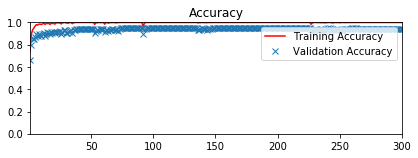

Training accuracies: 
[0.73841202341621948, 0.89410615268118498, 0.93284289783580387, 0.95025719136711362, 0.96678065470215324, 0.98051668156522143, 0.976982097203829, 0.98482715022259393, 0.98566050748584733, 0.98261444296089107, 0.98695364811046427, 0.99479870114635749, 0.98379263777085946, 0.9907755970170421, 0.99045949596252769, 0.9928158855139515, 0.98183855859639779, 0.99344808758872383, 0.99094801574757896, 0.99123538036127745, 0.98557429811201469, 0.99689646254202702, 0.99718382712146902, 0.99540216672892901, 0.99669530733641776, 0.98749964081140396, 0.9956895313083709, 0.99844823127101356, 0.99988505416822326, 0.99577574068220354, 0.99379292510118244, 0.99497111985976605, 0.99876433230839967, 0.99956895313083705, 0.98931003764475989, 0.99864938647662294, 0.99853444064484609, 1.0, 1.0, 1.0, 1.0, 0.99997126354205579, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98353400959797699, 0.99669530733641776, 0.99795971148596219, 0.9982758125233484, 0.99979884479439063, 0.99821833

Test Accuracy = 0.931
All done for cropped_grayscaled_normalized_data...


In [2]:
#%%capture output
for index, data_dict in enumerate(all_data):
    current_data_dict = data_dict
    current_data_dict_name = data_dict['name']
    print("Working on " + current_data_dict_name + "...")
    %store current_data_dict
    %store current_data_dict_name
    %run LeNet_eval.ipynb 'current_data_dict'
    print("All done for " + current_data_dict_name + "...")

In [3]:
#output.show()